# $\gamma p \rightarrow K^0 \Sigma^+$  MCMC Information

In [1]:
# Standard imports and setup...

# Numpy handles numerical manipulations efficiently...
import numpy as np

# Matplotlib is the standard python plotting library...
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn is a layer on top of Matplotlib...
import seaborn as sns

# Pandas is the python framework for handling datasets...
import pandas as pd

## Bins
4 x E $_{\gamma}$ bins, variable cos $\theta _{K0}$ bins

21 in total, approx 1,000 integrated signal per bin

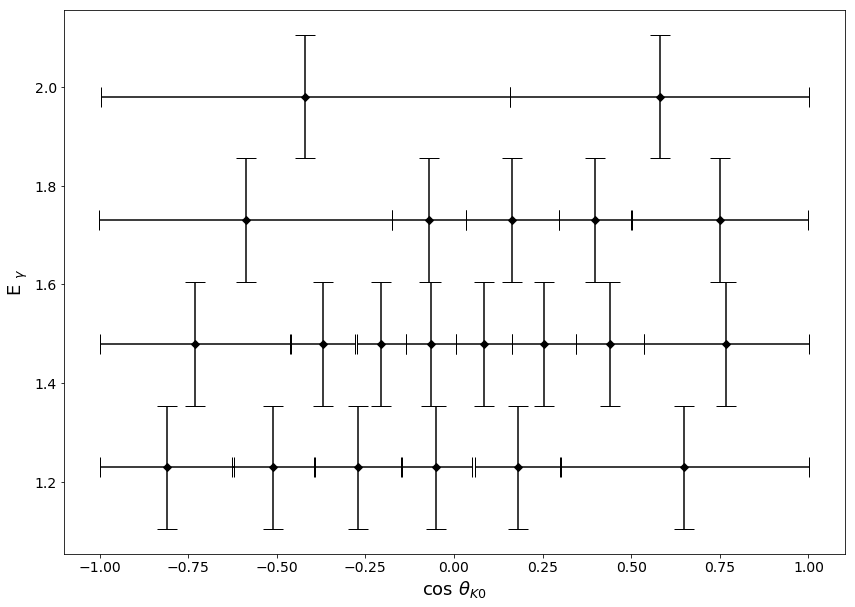

In [2]:
# bins
fig, axes = plt.subplots(1, 1, figsize=(14,10))

# Egamma 1.23
x=[-0.81,-0.51,-0.27,-0.05,0.18,0.65] 
y=[1.23,1.23,1.23,1.23,1.23,1.23]
x_err=[0.189,0.116,0.122,0.1,0.122,0.351]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.48
x=[-0.73,-0.37,-0.205,-0.065,0.085,0.255,0.44,0.768] 
y=[1.48,1.48,1.48,1.48,1.48,1.48,1.48,1.48]
x_err=[0.268,0.09,0.07,0.07,0.08,0.09,0.095,0.233]
y_err=[0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

# Egamma 1.73
x=[-0.588,-0.07,0.165,0.398,0.75] 
y=[1.73,1.73,1.73,1.73,1.73]
x_err=[0.413,0.105,0.13,0.103,0.25]
y_err=[0.125,0.125,0.125,0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

#Egamma 1.98
x=[-0.42,0.58] 
y=[1.98,1.98]
x_err=[0.577,0.4225]
y_err=[0.125,0.125]
plt.errorbar(x,y,xerr=x_err,yerr=y_err,color='black', fmt='D', capsize=10)

axes.set_xlabel(r'cos $\theta _{K0}$', fontsize=18)
axes.set_ylabel(r'E $_{\gamma}$', fontsize=18)
plt.tick_params(labelsize=14)


## Read in csv data and extract bin centres from file name


In [3]:
# Definition of columns in csv
csv_labels = ['Obs','Val','FileName']
# Read file into a DataFrame...
csv_df = pd.read_csv('/home/louise/g8K0Sig/code/MCMCamp2/out8/CsvAllBins.csv', names=csv_labels)
# Print first few rows as a check...
csv_df.head()

,Obs,Val,FileName
0,B,0.485772,costhK0CMS0.58_Egamma1.98_
1,Ox,-0.214468,costhK0CMS0.58_Egamma1.98_
2,Oz,-0.845896,costhK0CMS0.58_Egamma1.98_
3,R,0.384810,costhK0CMS0.58_Egamma1.98_
4,T,0.114062,costhK0CMS0.58_Egamma1.98_


In [4]:
# get the bin centres from the file name
file_str = 'costhK0CMS0.58_Egamma1.98_'
file_str.find('_Egamma')
file_str[10:file_str.find('_Egamma')] 
bins = file_str[10:file_str.find('_Egamma')], file_str[file_str.find('_Egamma')+7:len(file_str)-1]
print(bins)

('0.58', '1.98')


In [5]:
# Create new column in df with costh bin centre
def get_costh(file_str):
    return float(file_str[10:file_str.find('_Egamma')])

csv_df['costh'] = csv_df['FileName'].apply(get_costh)
csv_df.head()

,Obs,Val,FileName,costh
0,B,0.485772,costhK0CMS0.58_Egamma1.98_,0.58
1,Ox,-0.214468,costhK0CMS0.58_Egamma1.98_,0.58
2,Oz,-0.845896,costhK0CMS0.58_Egamma1.98_,0.58
3,R,0.384810,costhK0CMS0.58_Egamma1.98_,0.58
4,T,0.114062,costhK0CMS0.58_Egamma1.98_,0.58


In [6]:
# Create new column in df with Egamma bin centre
def get_Egamma(file_str):
    return float(file_str[file_str.find('_Egamma')+7:len(file_str)-1])

csv_df['Egamma'] = csv_df['FileName'].apply(get_Egamma)
csv_df.head()

,Obs,Val,FileName,costh,Egamma
0,B,0.485772,costhK0CMS0.58_Egamma1.98_,0.58,1.98
1,Ox,-0.214468,costhK0CMS0.58_Egamma1.98_,0.58,1.98
2,Oz,-0.845896,costhK0CMS0.58_Egamma1.98_,0.58,1.98
3,R,0.384810,costhK0CMS0.58_Egamma1.98_,0.58,1.98
4,T,0.114062,costhK0CMS0.58_Egamma1.98_,0.58,1.98


## cos $\theta _{K0}$ dependence for each E $_{\gamma}$ bin

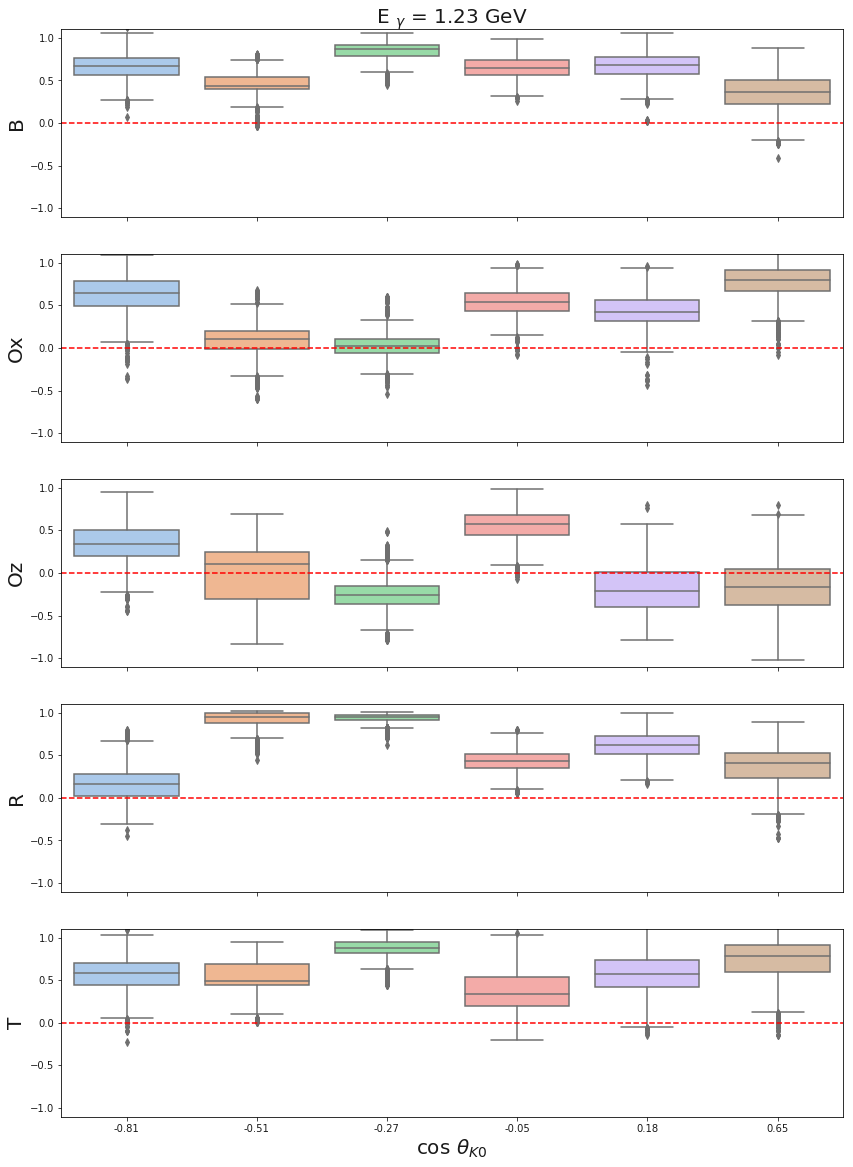

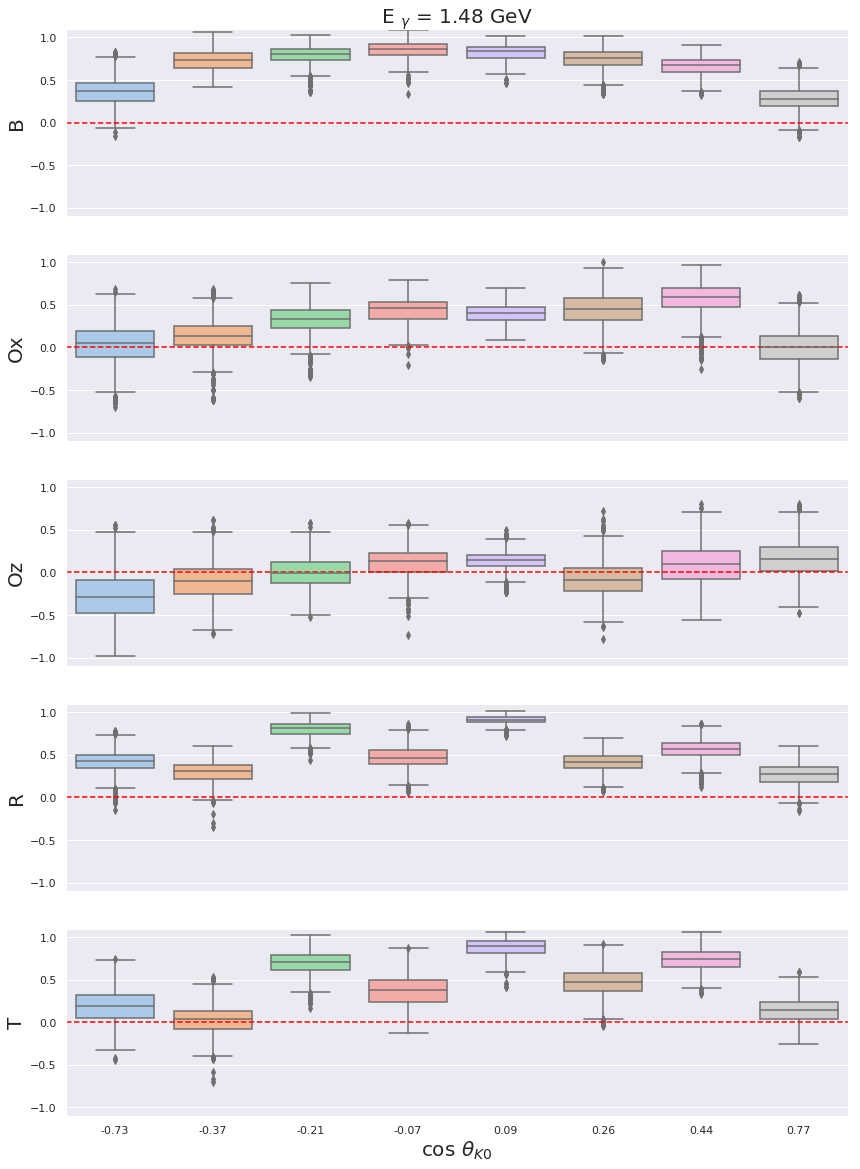

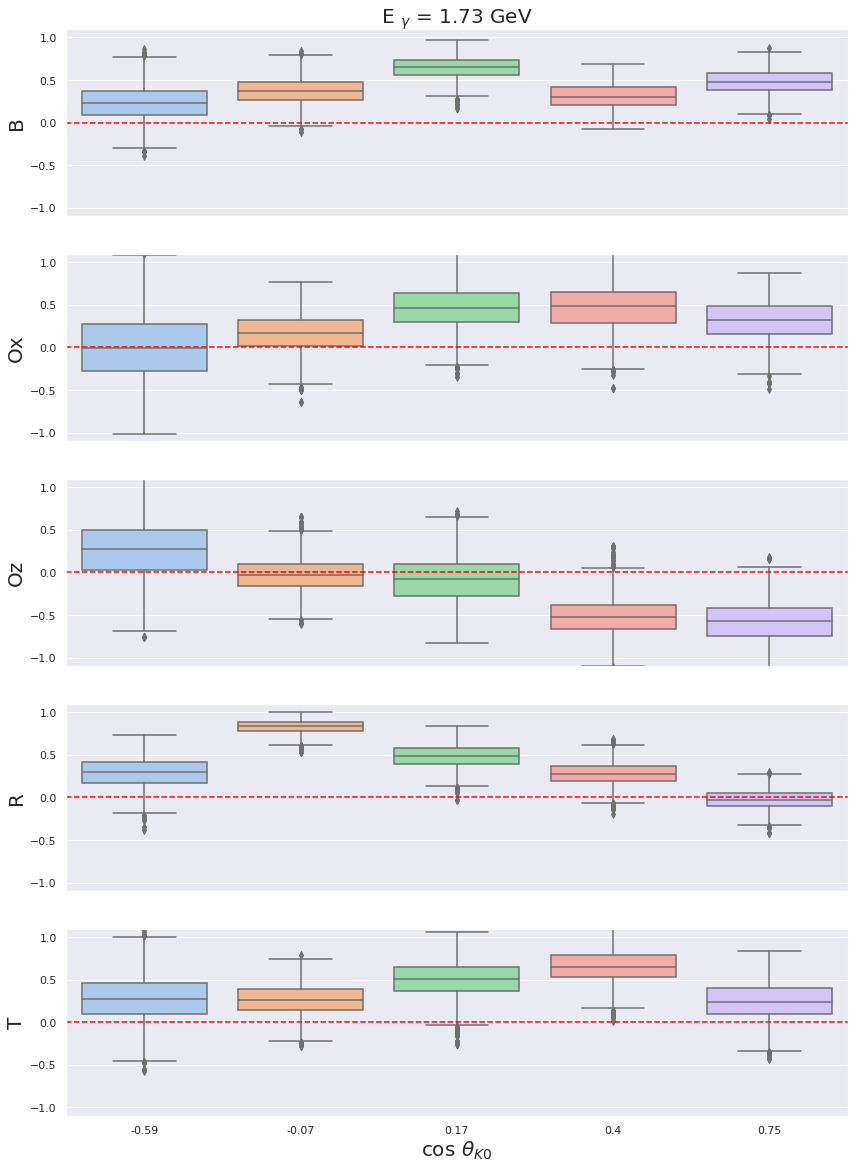

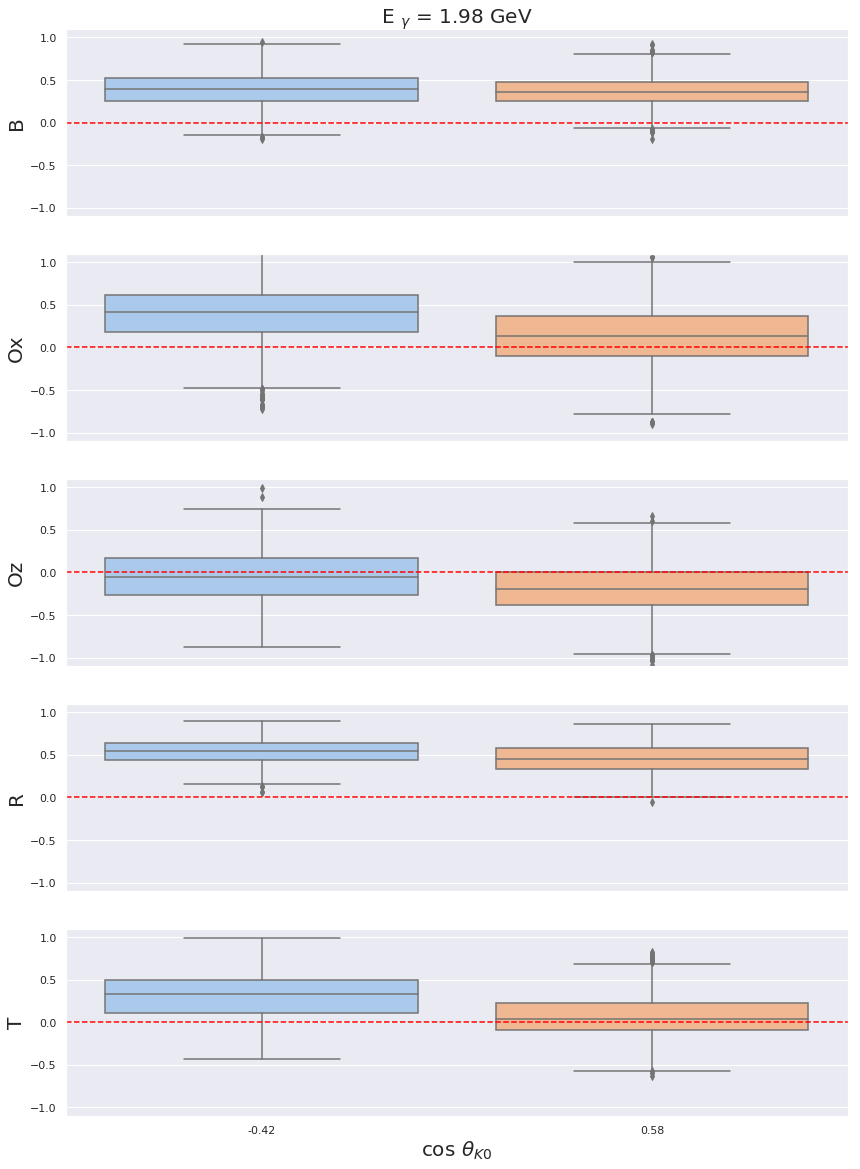

In [7]:
# Plot each bin and observable
# costh dependance

obs_labels = ['B','Ox','Oz','R','T']
n_obs = len(obs_labels)
Eg_bins = [1.23, 1.48, 1.73, 1.98]

for bin_idx in range(len(Eg_bins)):
    fig, ax = plt.subplots(n_obs, 1, sharex=True, figsize=(14,20))
    sns.set(palette="pastel")

    ax[0].set_title(r'E $_{\gamma}$ = ' + str(Eg_bins[bin_idx]) + ' GeV', fontsize=20)
    for i in range(n_obs):
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[bin_idx]]
        dfObs = dfEg[dfEg['Obs']==obs_labels[i]]
        sns.boxplot(data=dfObs, x="costh", y="Val", ax=ax[i]) 

        ax[i].set_ylim(-1.1,1.1)
        ax[i].axhline(0.0,color='red',linestyle='--')
        ax[i].set_ylabel(obs_labels[i], fontsize=20)

        ax[i].set_xlabel('')

    ax[n_obs-1].set_xlabel(r'cos $\theta _{K0}$', fontsize=20)
    plt.show()
    

## cos $\theta _{K0}$ dependence for all E $_{\gamma}$ bins

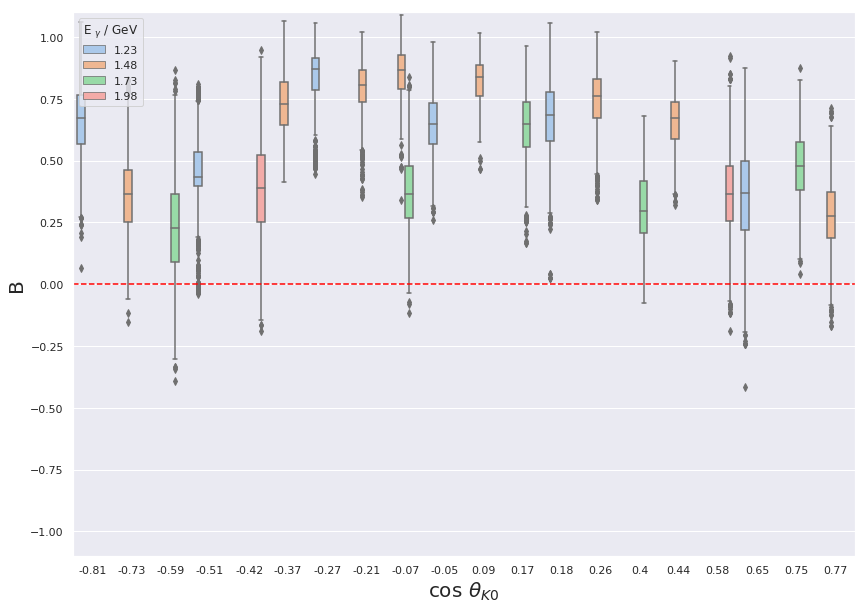

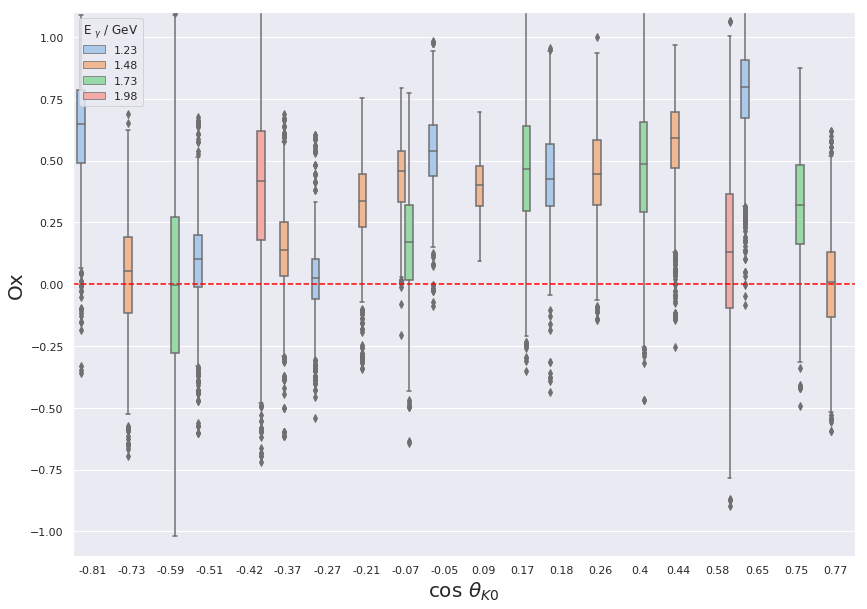

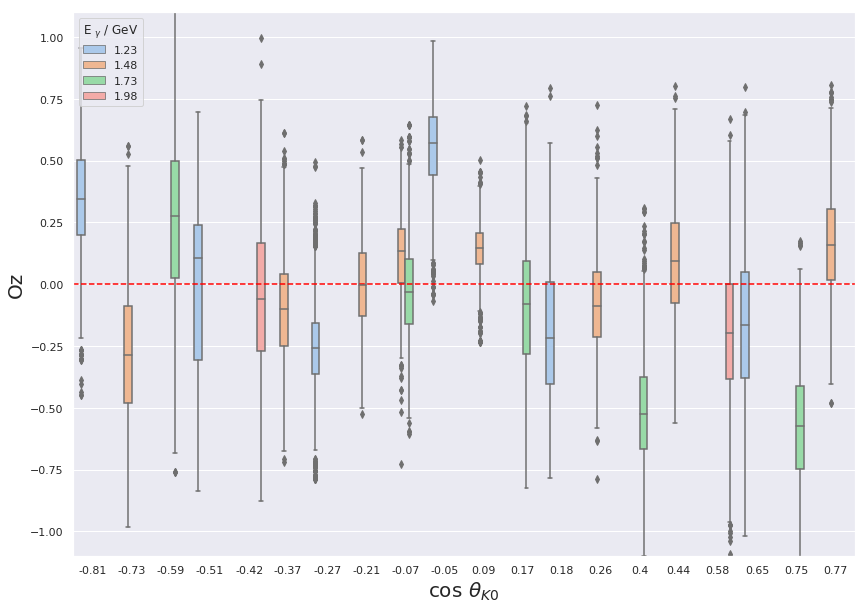

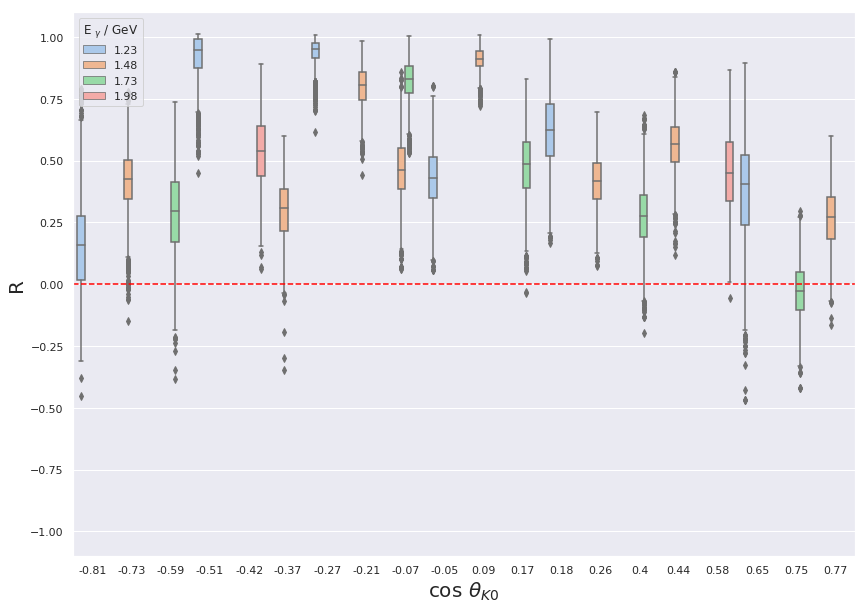

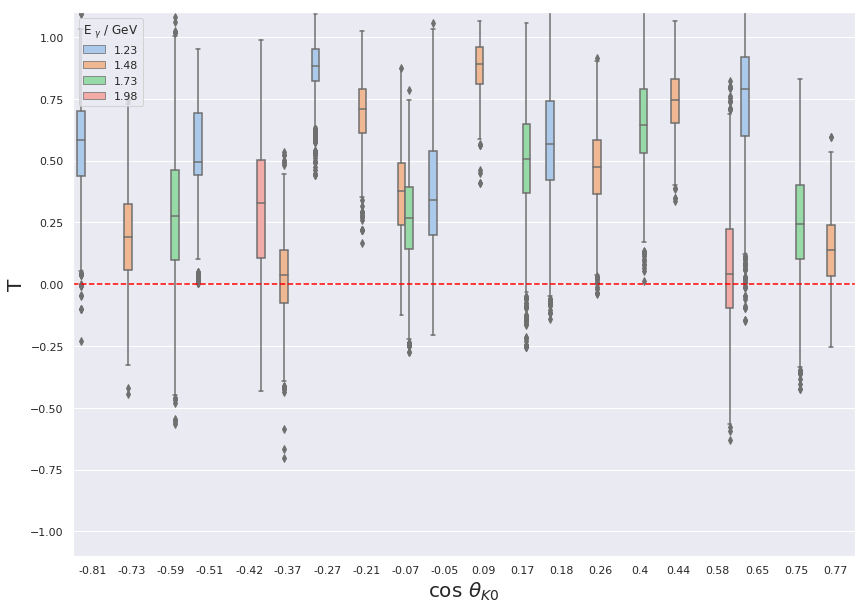

In [8]:
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="costh", y="Val", hue='Egamma') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'E $_{\gamma}$ / GeV')
    ax.set_xlabel(r'cos $\theta _{K0}$', fontsize=20)     
    plt.show()
    


## E $_{\gamma}$ dependence for all cos $\theta _{K0}$ bins

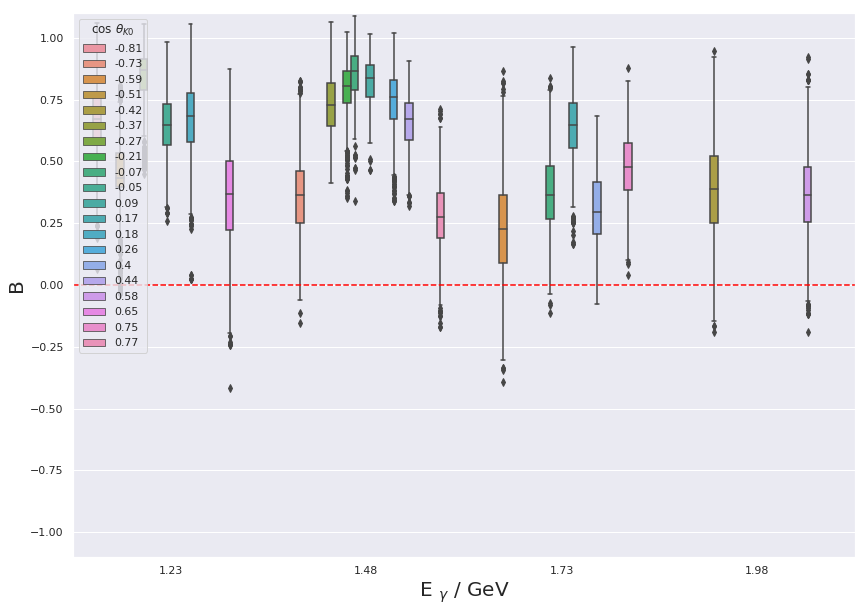

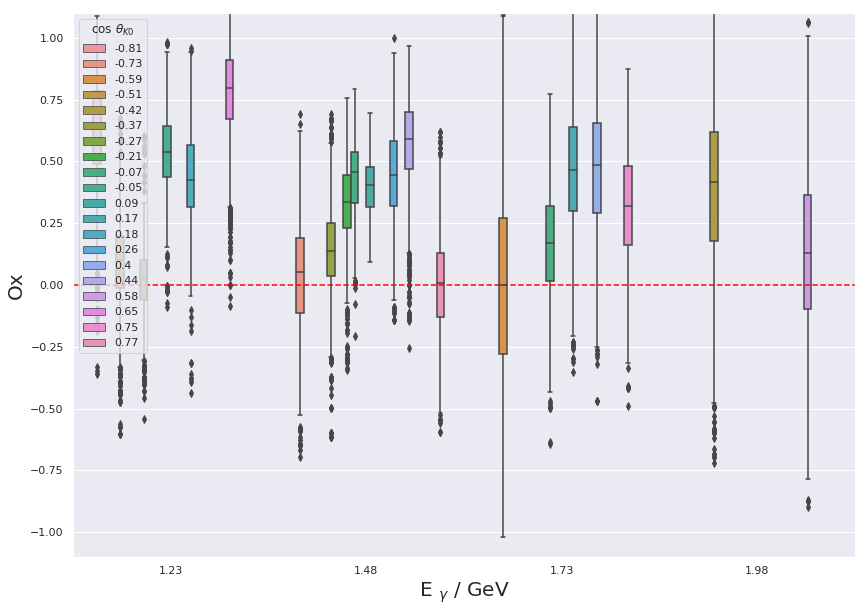

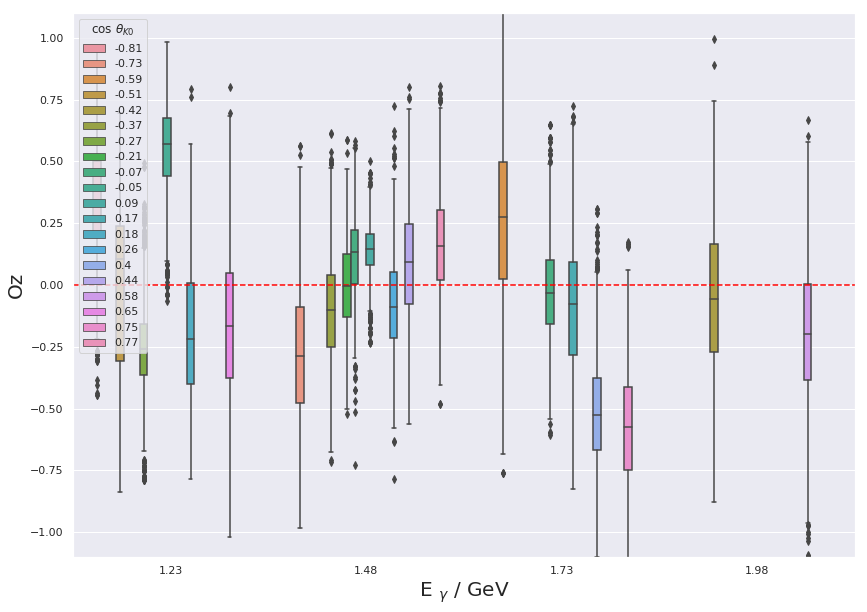

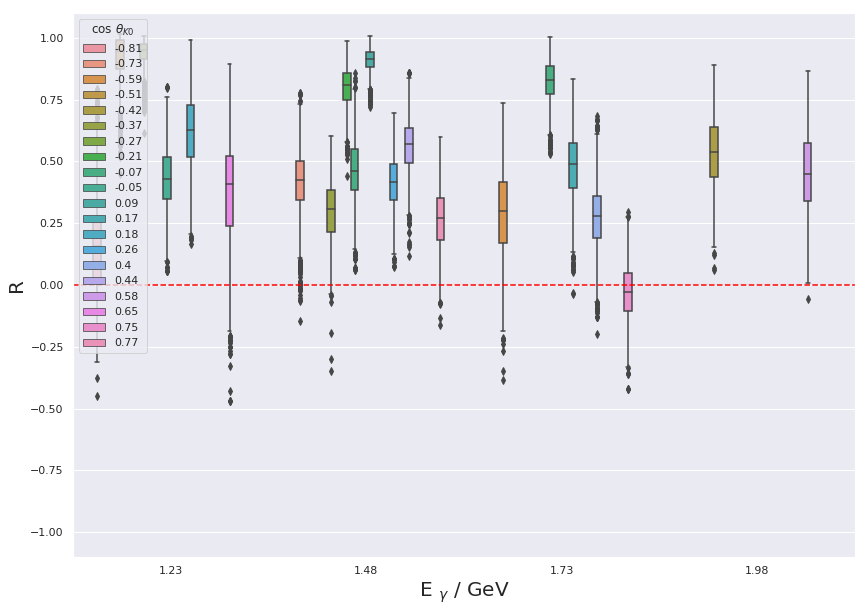

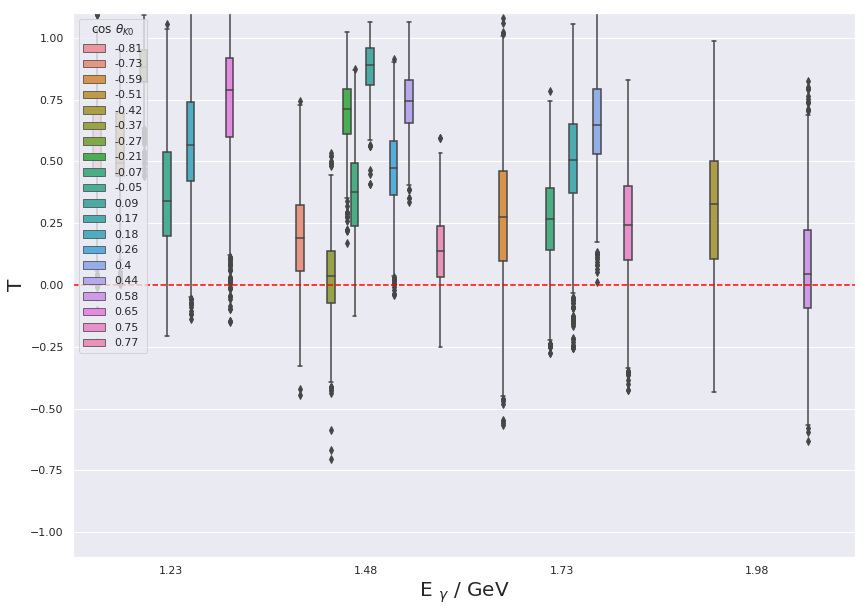

In [9]:
# Plot each bin and observable
# Egamma dependance
for i in range(n_obs):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14,10))
    dfObs = csv_df[csv_df['Obs']==obs_labels[i]]
    sns.boxplot(data=dfObs, x="Egamma", y="Val", hue='costh') 
    ax.set_ylim(-1.1,1.1)
    ax.axhline(0.0,color='red',linestyle='--')
    ax.set_ylabel(obs_labels[i], fontsize=20)

    ax.legend(loc="upper left", title=r'cos $\theta _{K0}$')
    ax.set_xlabel(r'E $_{\gamma}$ / GeV', fontsize=20)     
    plt.show()
    

## Corner plots for all bins

In [10]:
# combine the rows into 1 row with 5 values

# get the bin
dfEg = csv_df[csv_df['Egamma']==1.23]
dfCosth = dfEg[dfEg['costh']==-0.81]

# get df for each obs
dfB = dfCosth[dfCosth['Obs']=='B']
dfB = dfB.reset_index()
dfOx = dfCosth[dfCosth['Obs']=='Ox']
dfOx = dfOx.reset_index()
dfOz = dfCosth[dfCosth['Obs']=='Oz']
dfOz = dfOz.reset_index()
dfR = dfCosth[dfCosth['Obs']=='R']
dfR = dfR.reset_index()
dfT = dfCosth[dfCosth['Obs']=='T']
dfT = dfT.reset_index()

# merge them
pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
          axis=1, keys=['B','Ox','Oz','R','T'])


,B,Ox,Oz,R,T
0,0.713526,0.410782,0.121502,-0.160456,0.250895
1,0.348171,0.895414,0.161041,0.324558,0.824908
2,0.579115,0.992279,0.148872,0.014507,0.456020
3,0.579115,0.992279,0.148872,0.014507,0.456020
4,0.580704,0.989058,0.154249,0.015800,0.454974
5,0.580704,0.989058,0.154249,0.015800,0.454974
6,0.580704,0.989058,0.154249,0.015800,0.454974
7,0.580704,0.989058,0.154249,0.015800,0.454974
8,0.580704,0.989058,0.154249,0.015800,0.454974
9,0.595459,0.951799,0.214607,0.027804,0.445262


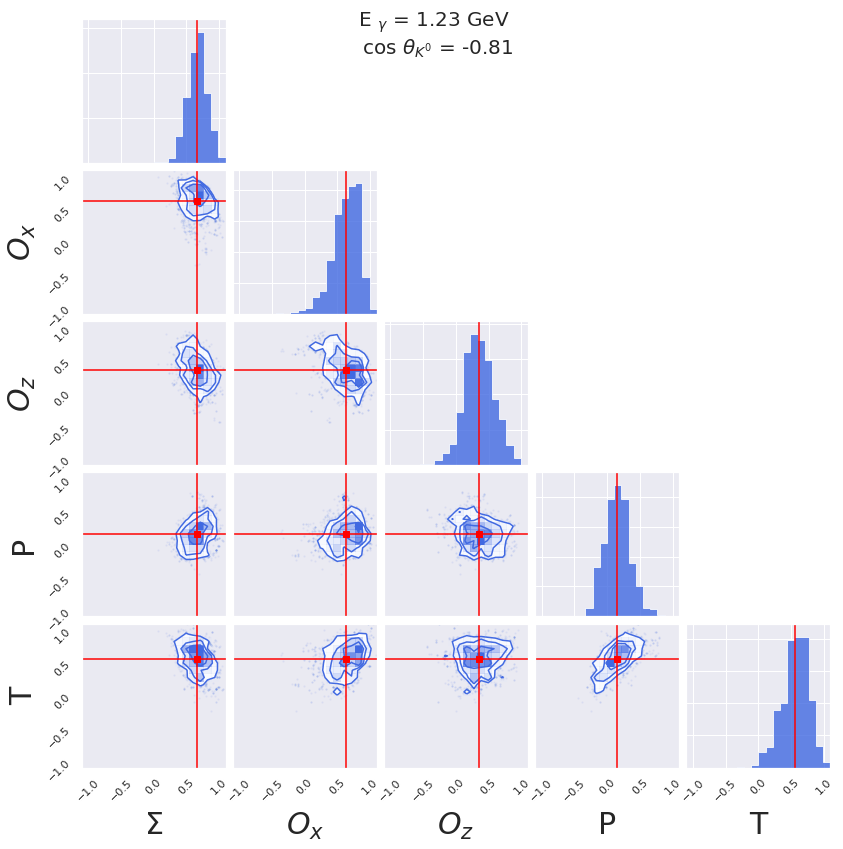

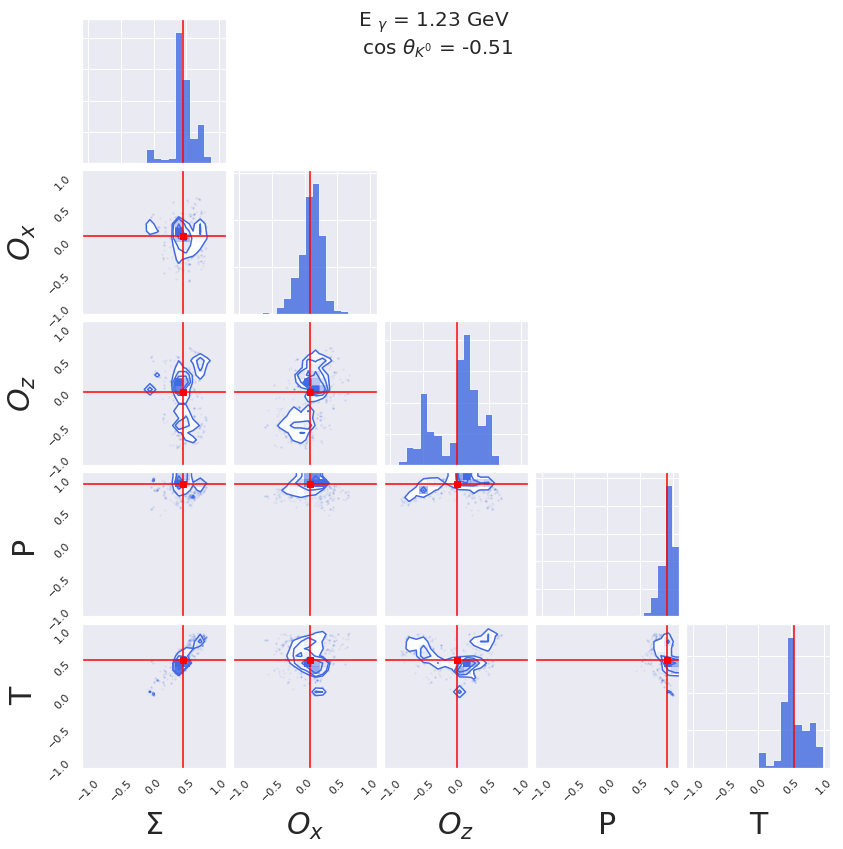

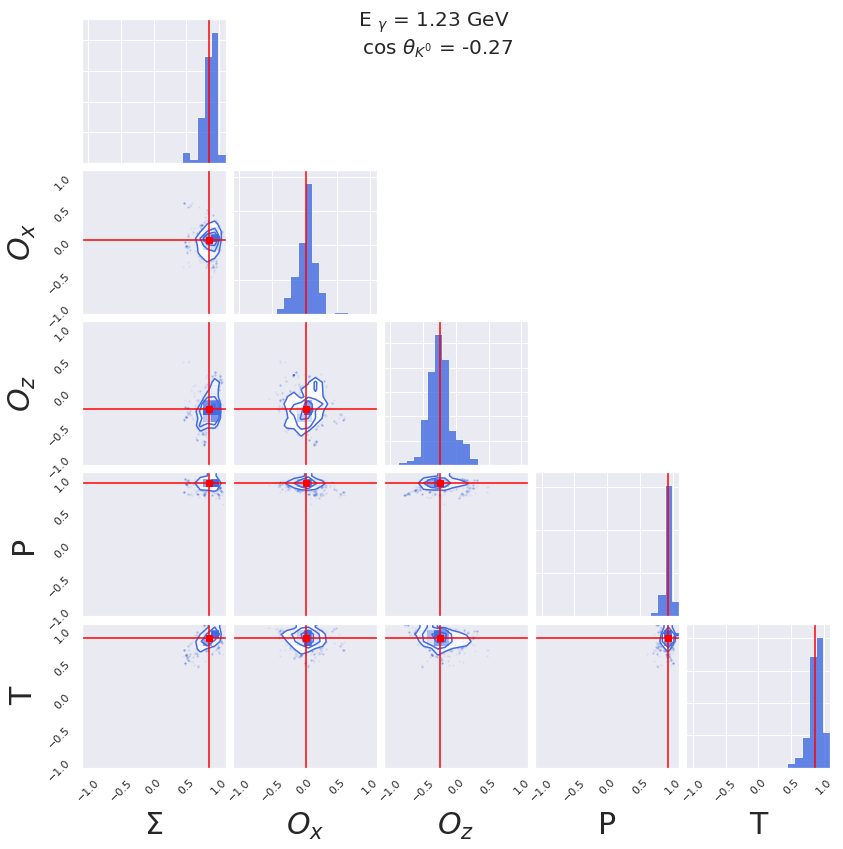

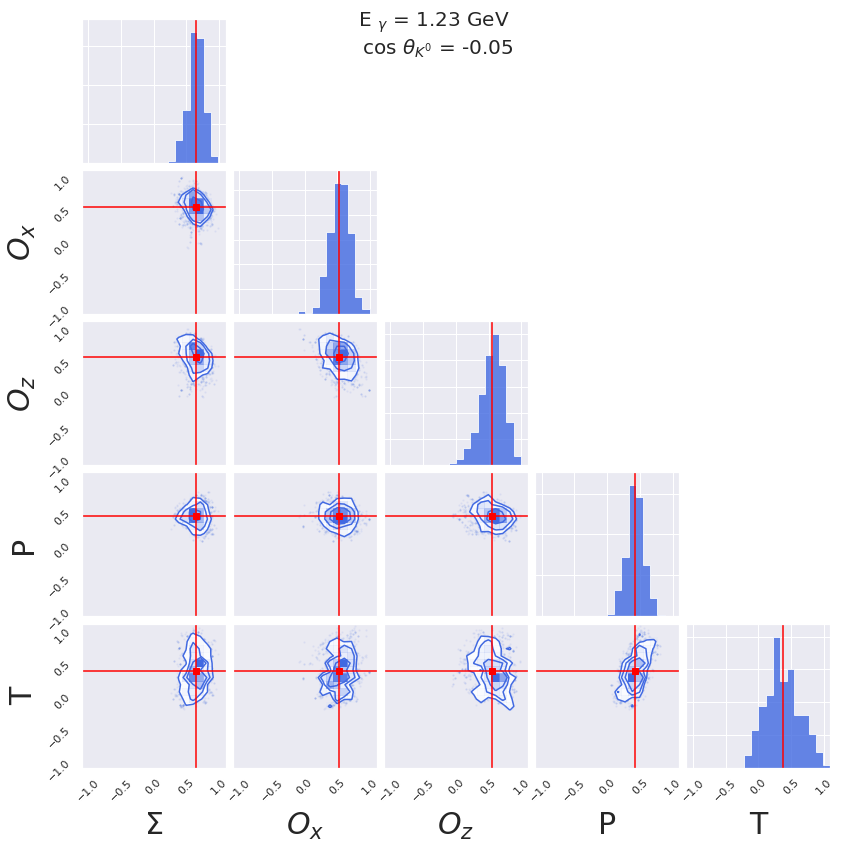

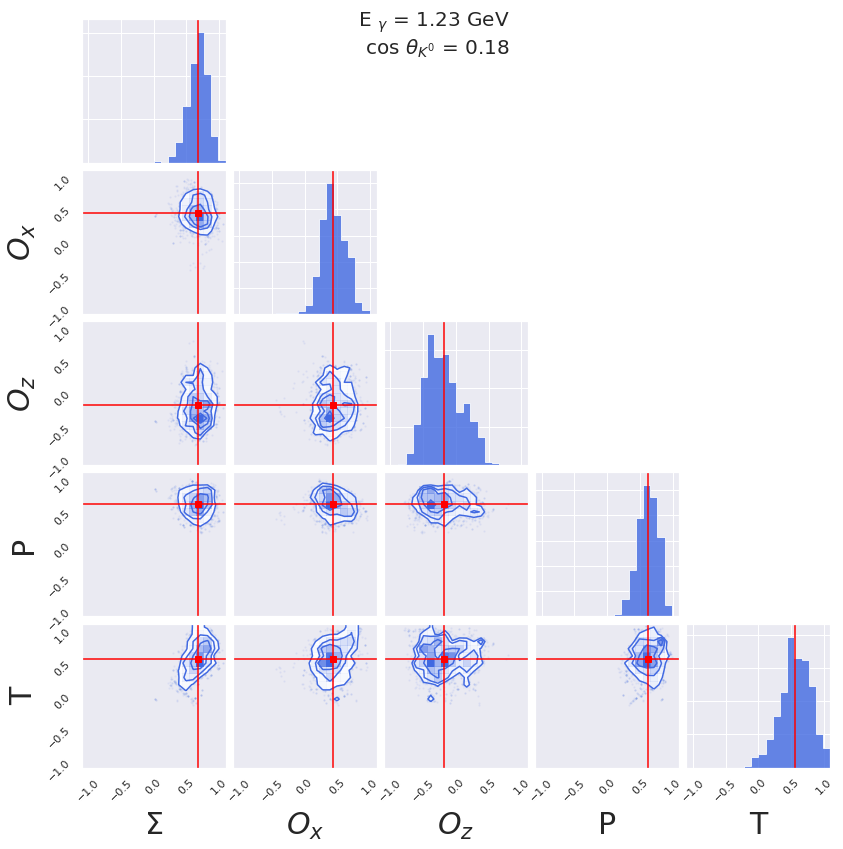

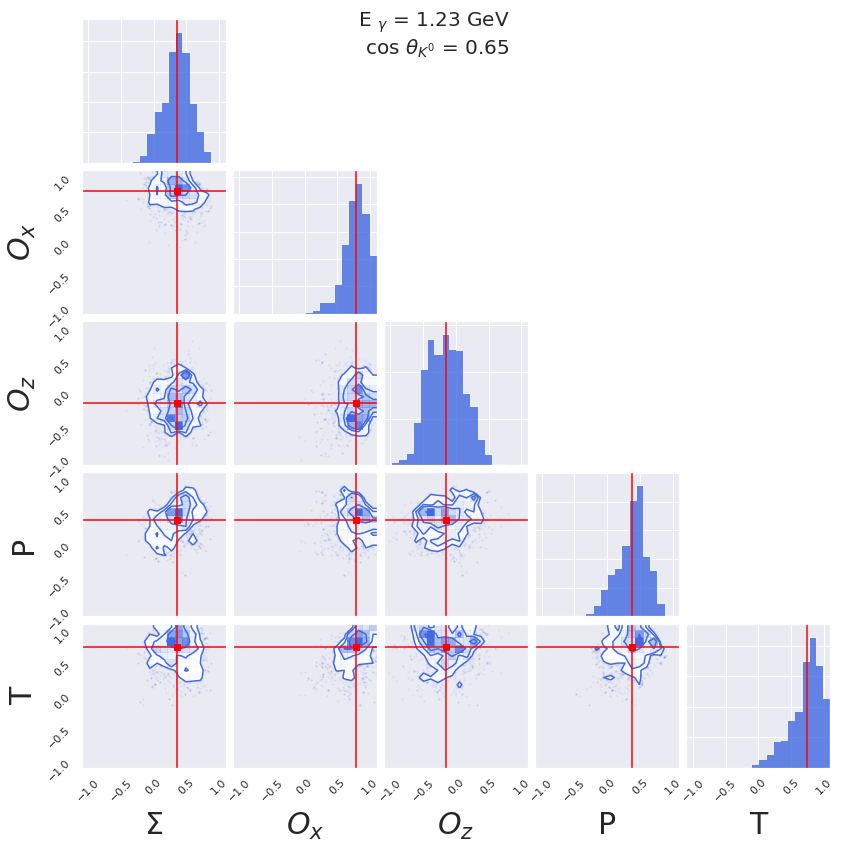

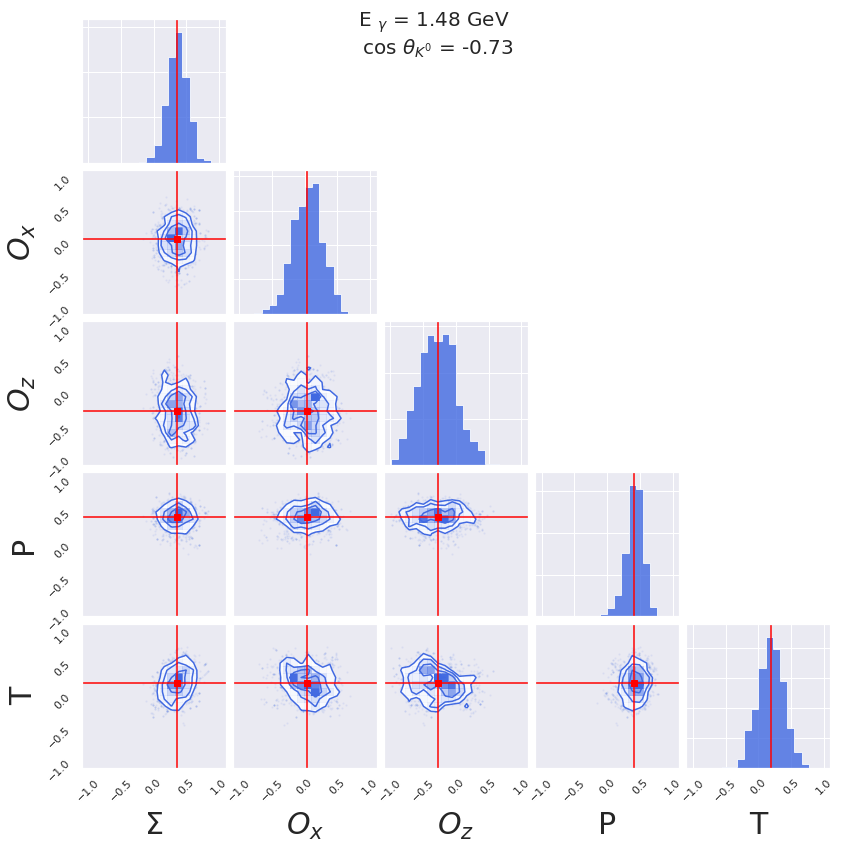

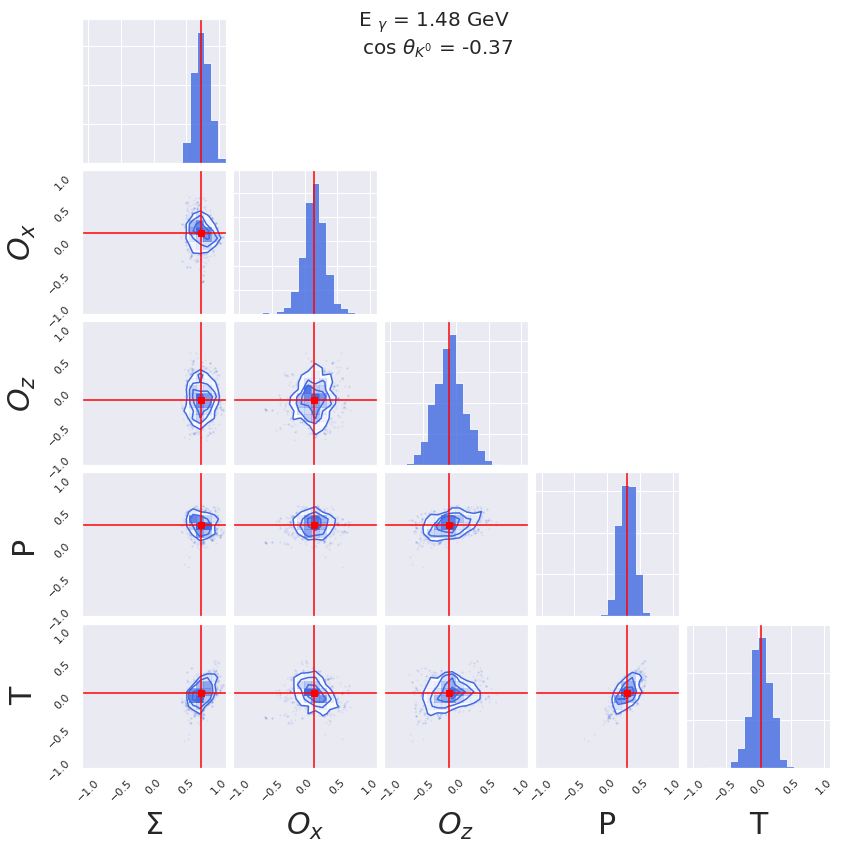

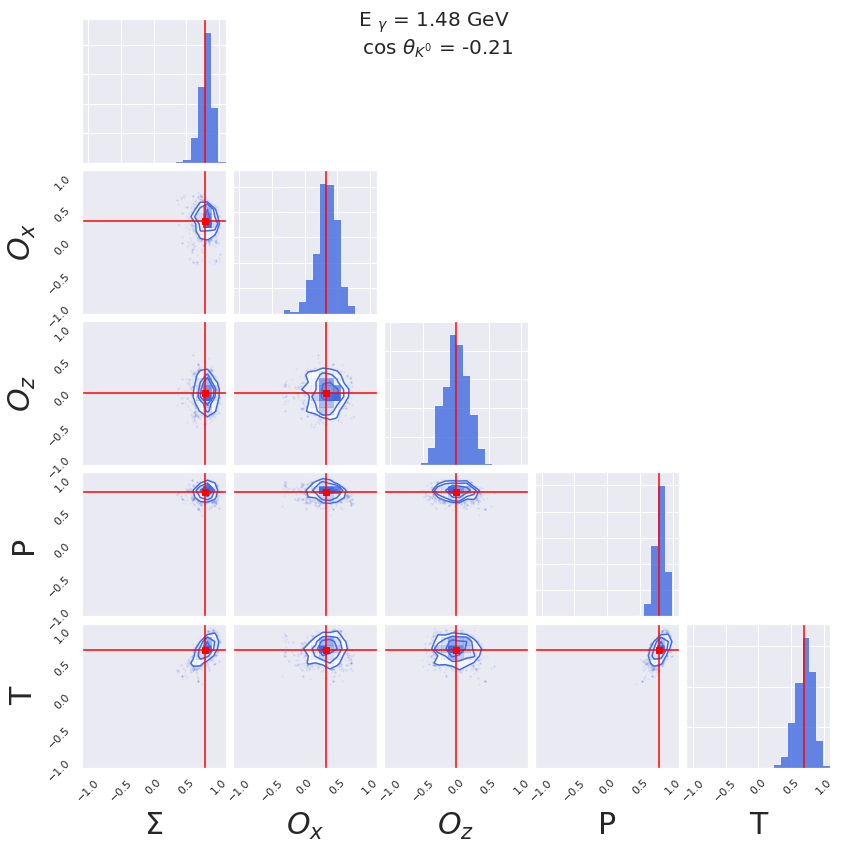

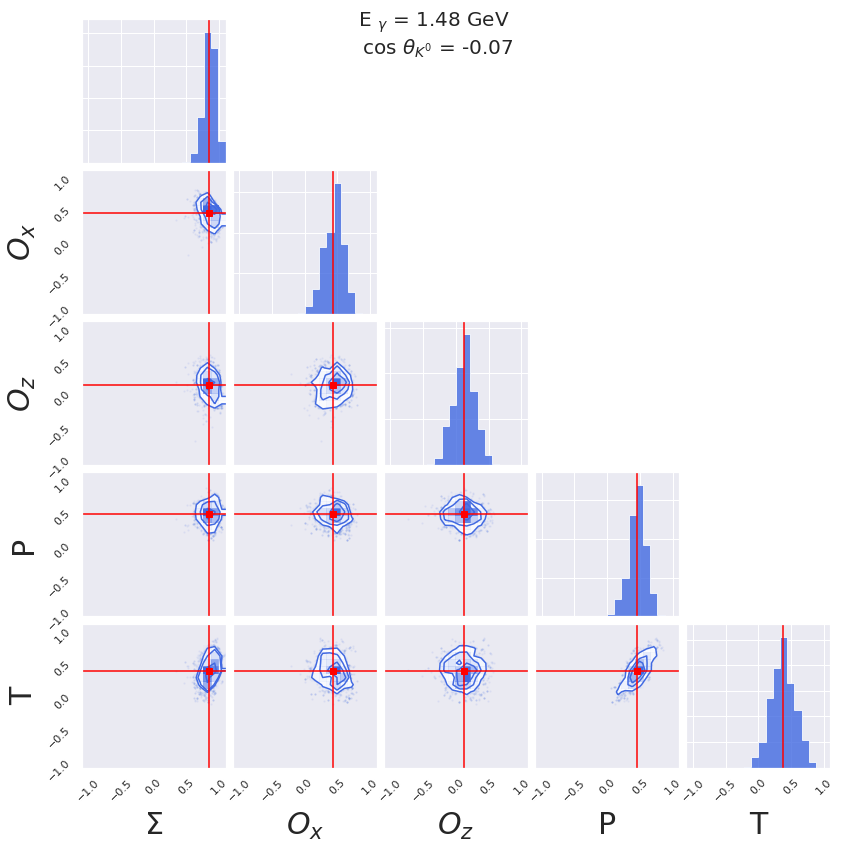

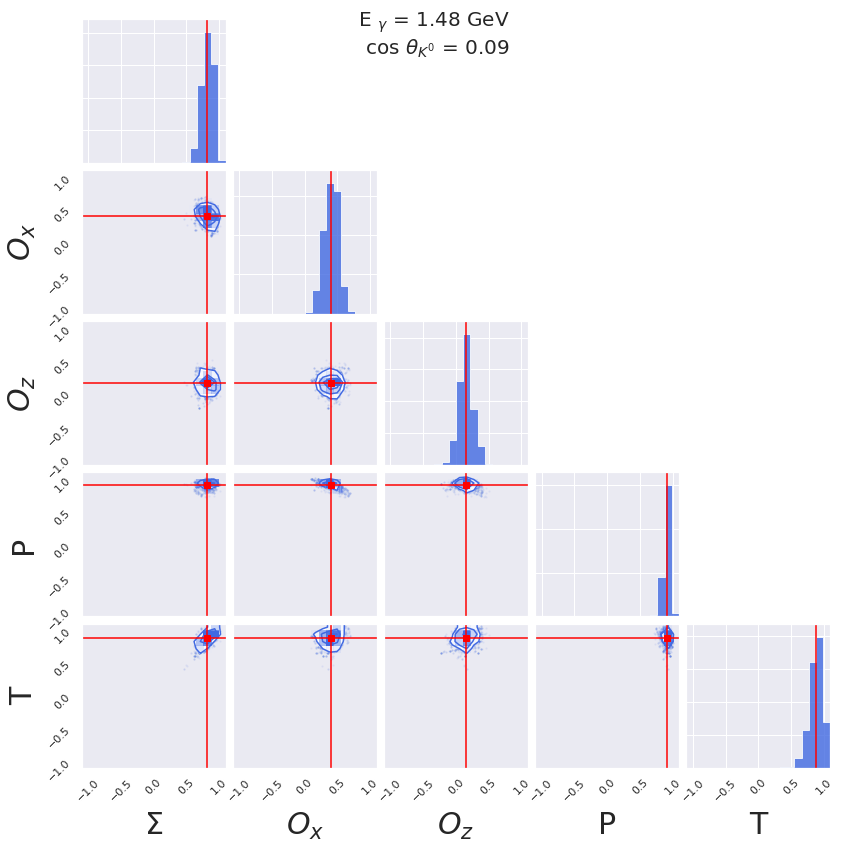

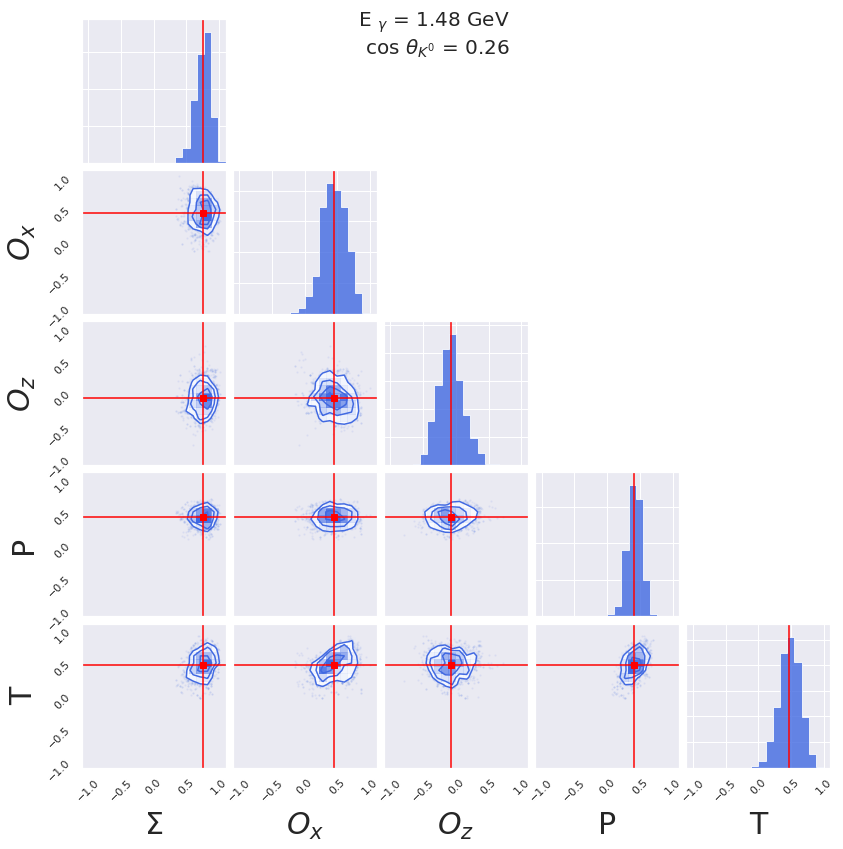

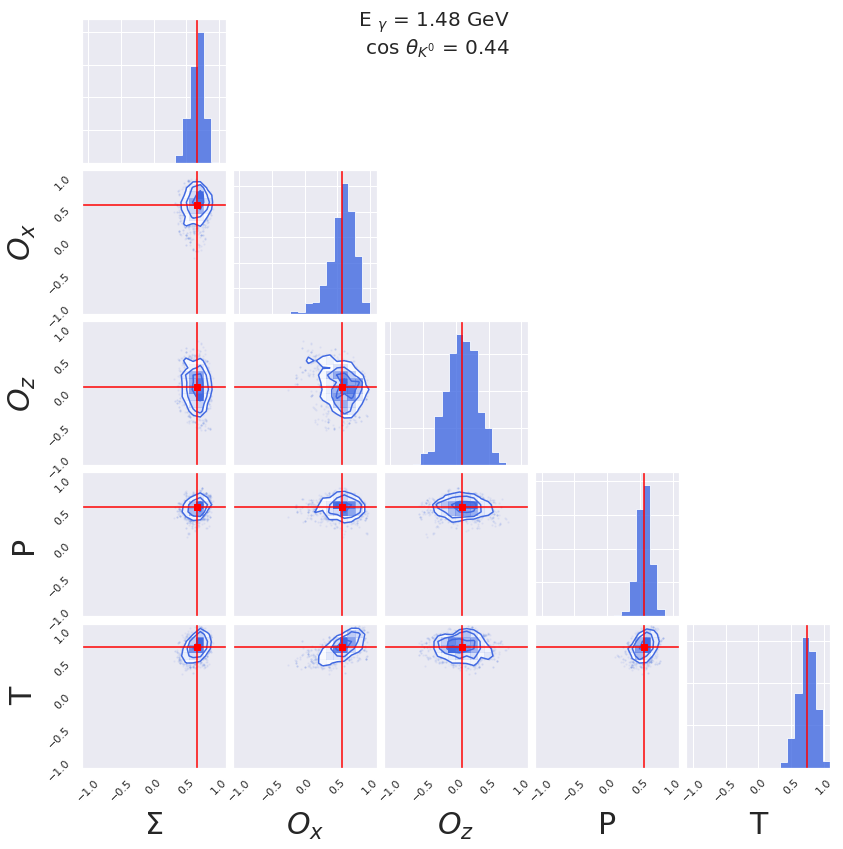

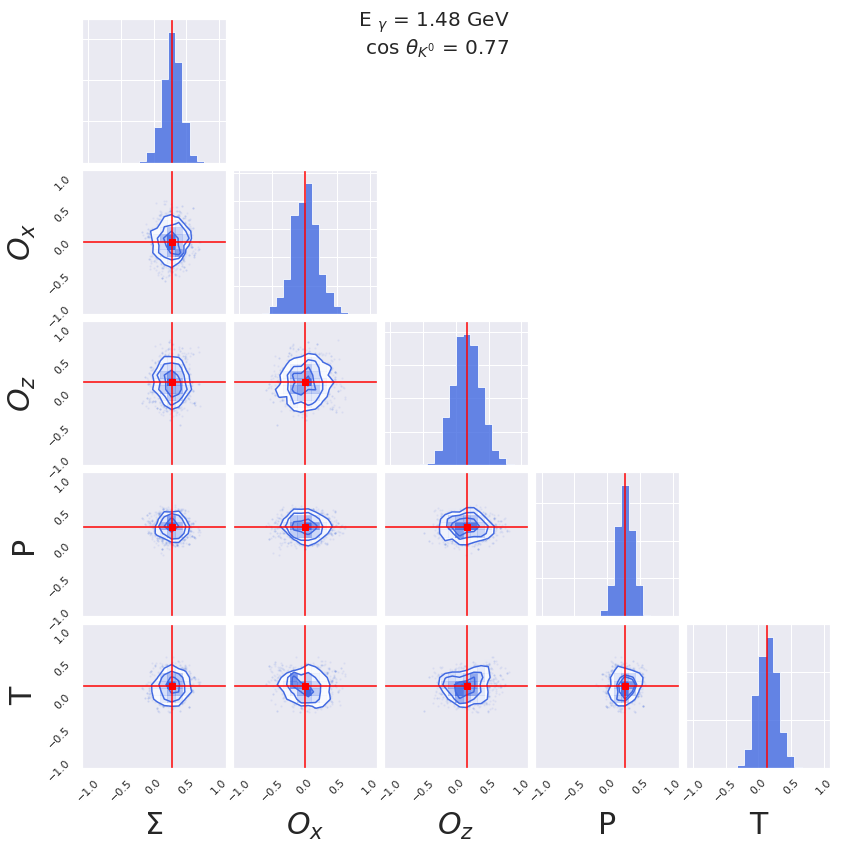

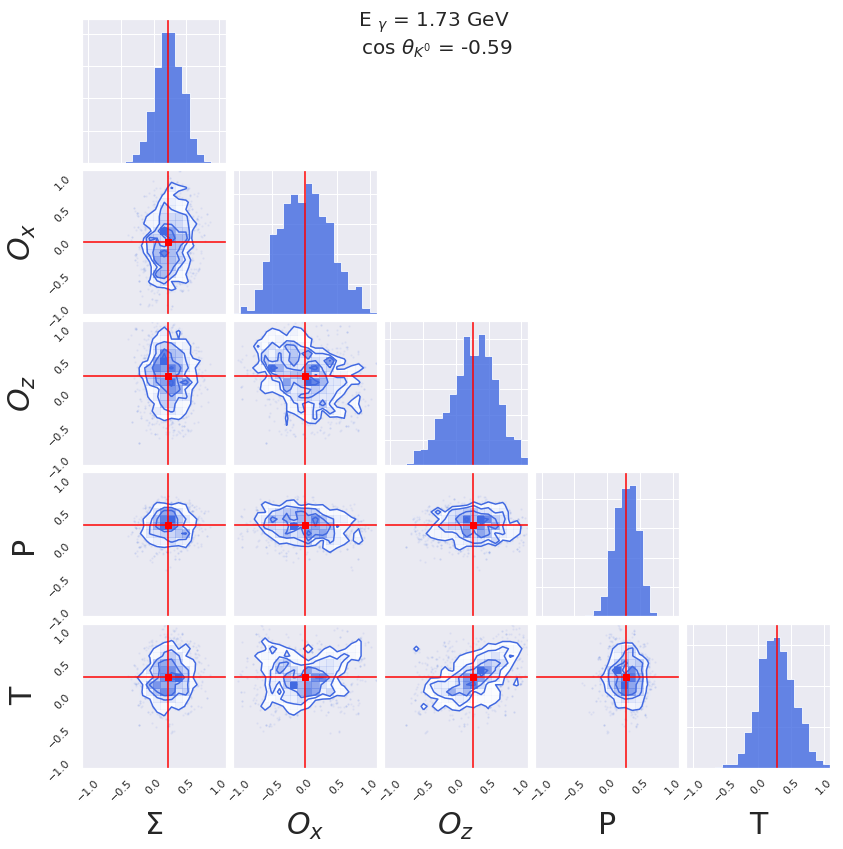

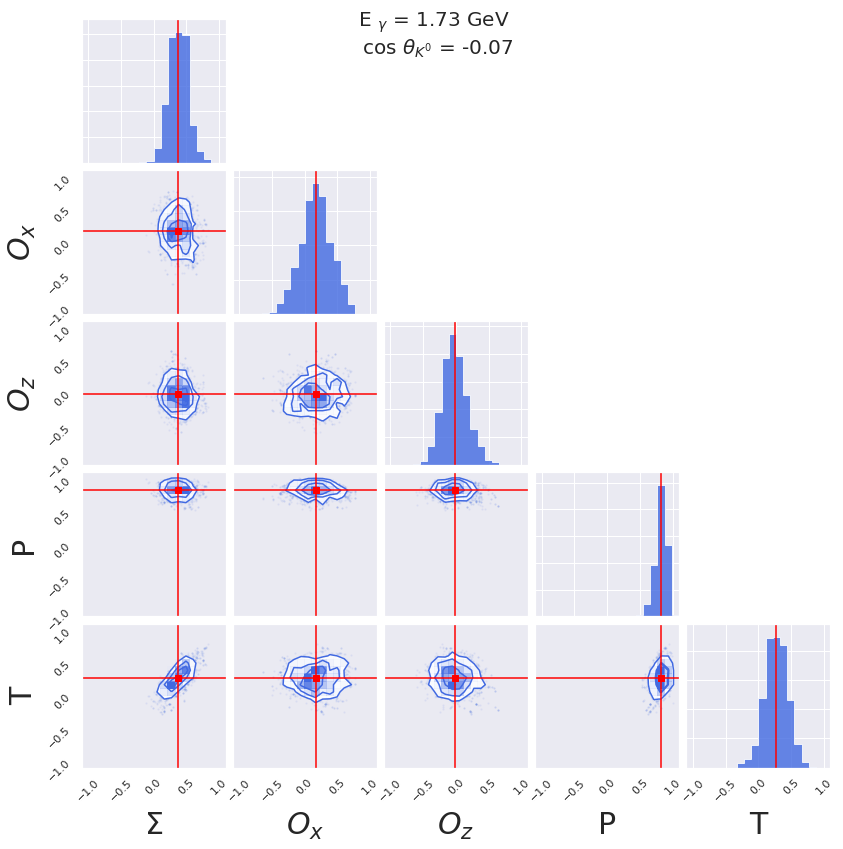

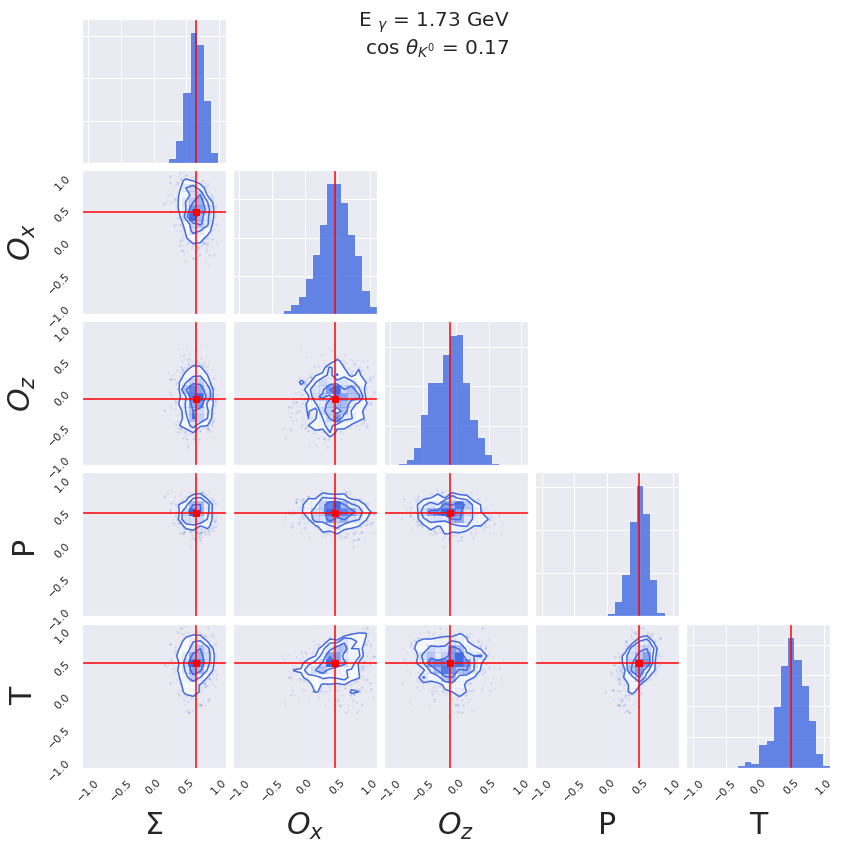

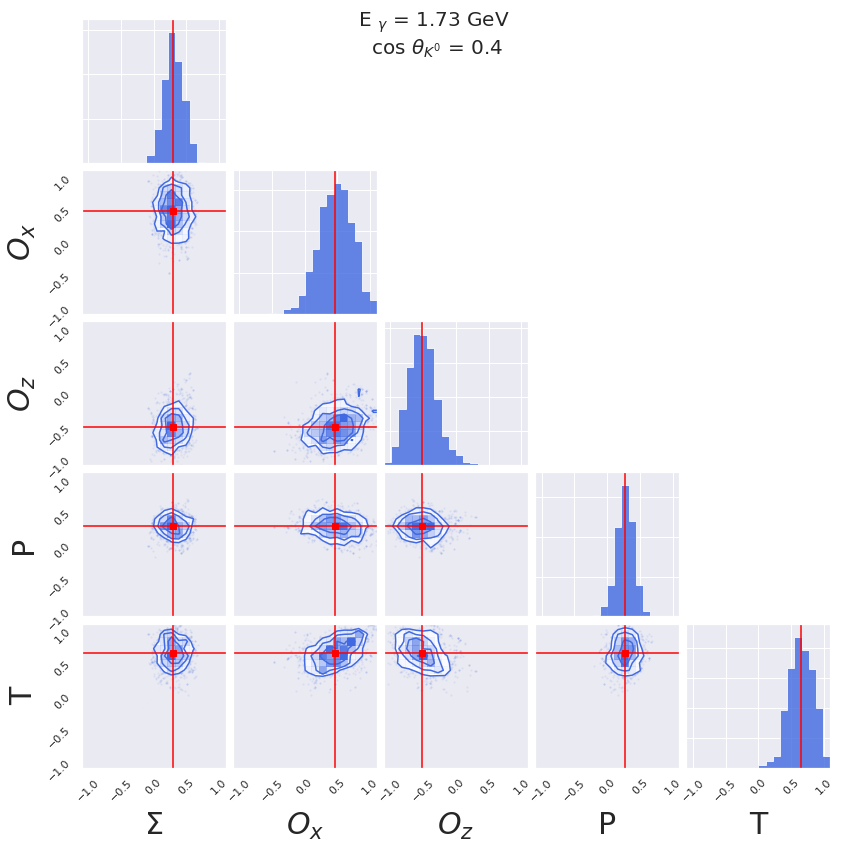

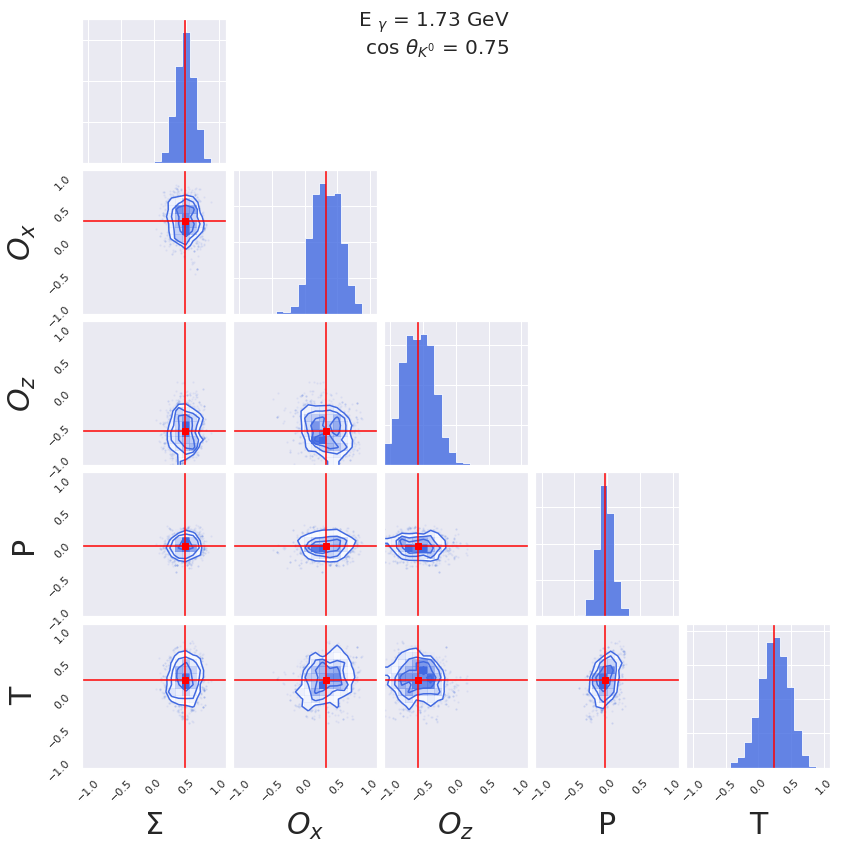

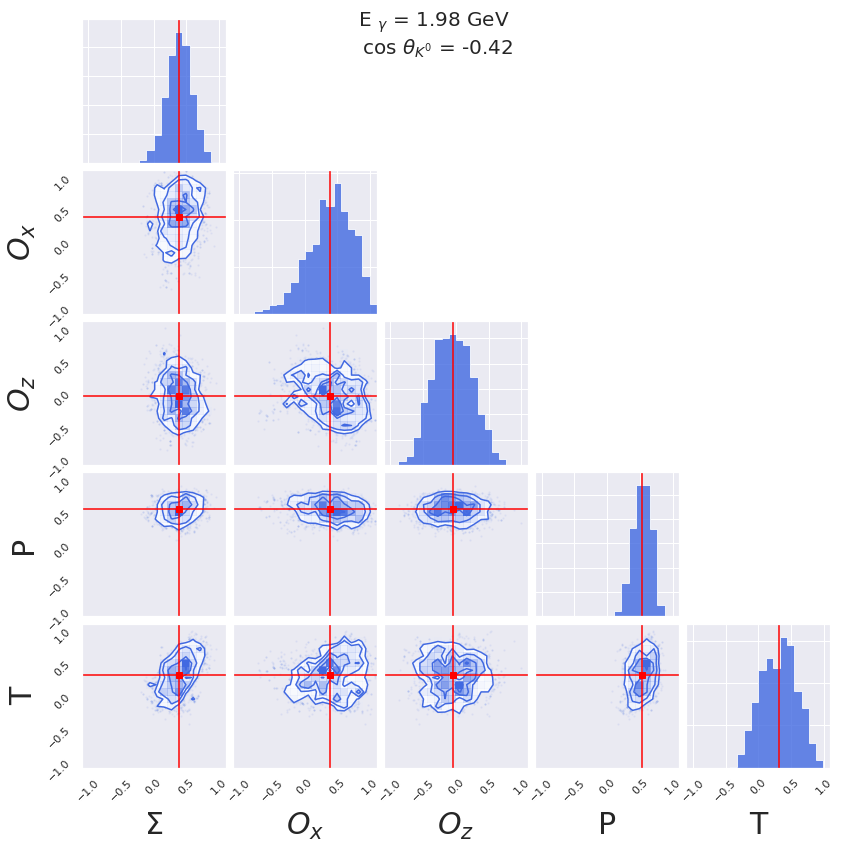

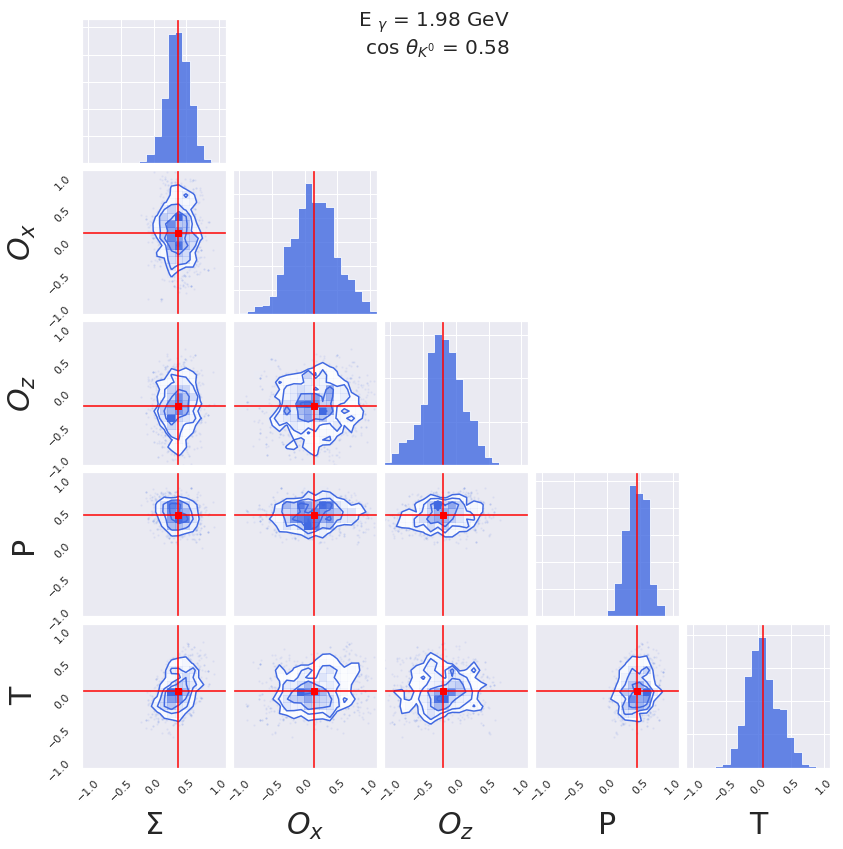

In [11]:
# corner plots for all bins

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # corner plot for one bin
        import corner 

        fig = corner.corner(dfObs,
                            color='royalblue', 
                            range=[(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1),(-1.1,1.1)],
                            truths=dfObs.mean().values, truth_color='red',
                            label_kwargs={'fontsize':30, 'labelpad':20},
                            hist_kwargs = {'histtype':'stepfilled','alpha':0.8},
                            labels=['$\Sigma$','$O_x$','$O_z$','P','T'])
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV\n '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()

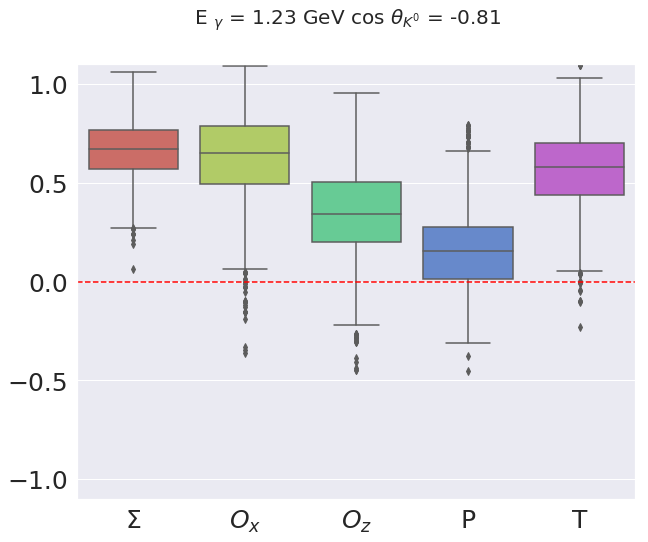

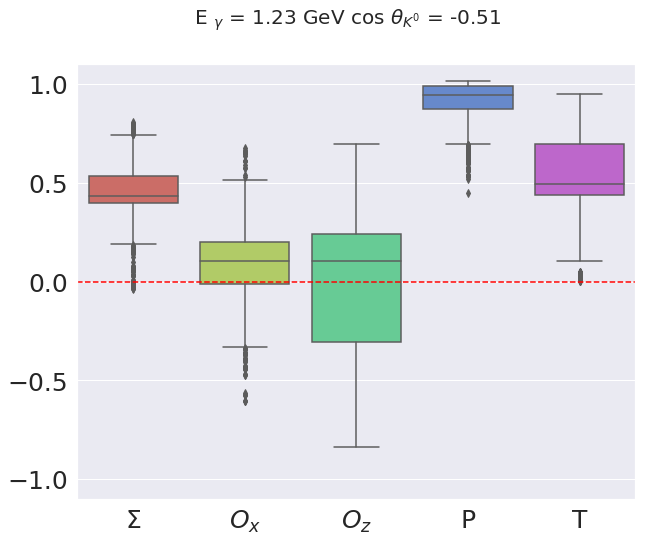

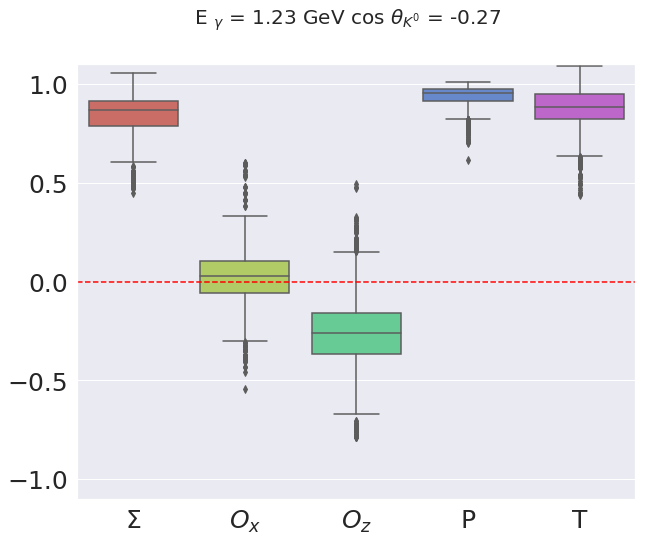

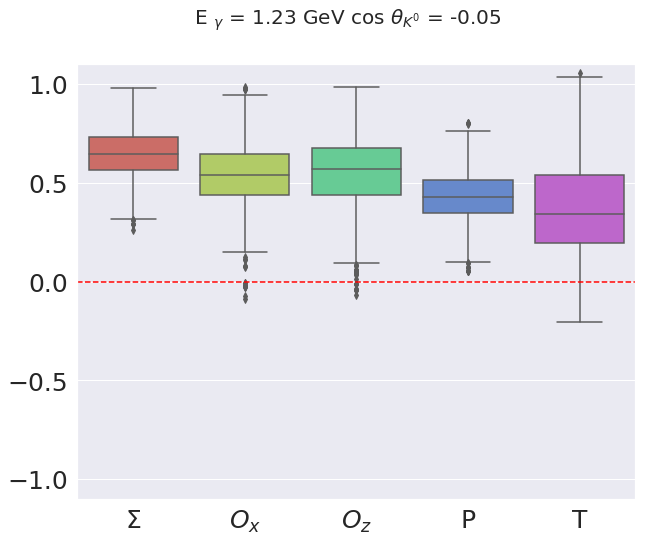

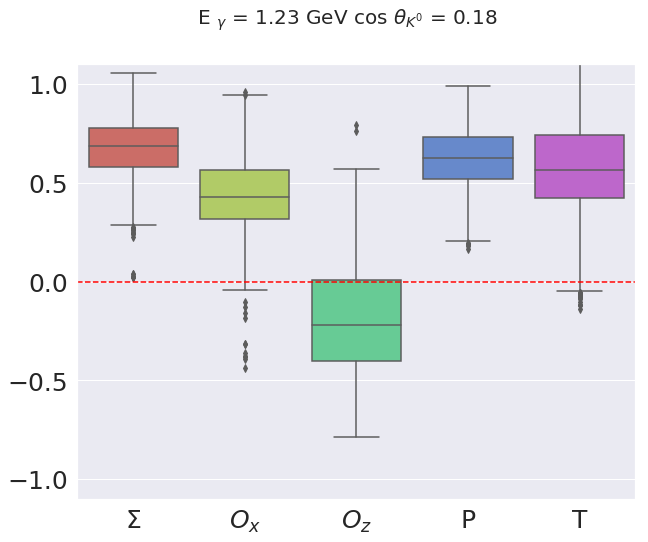

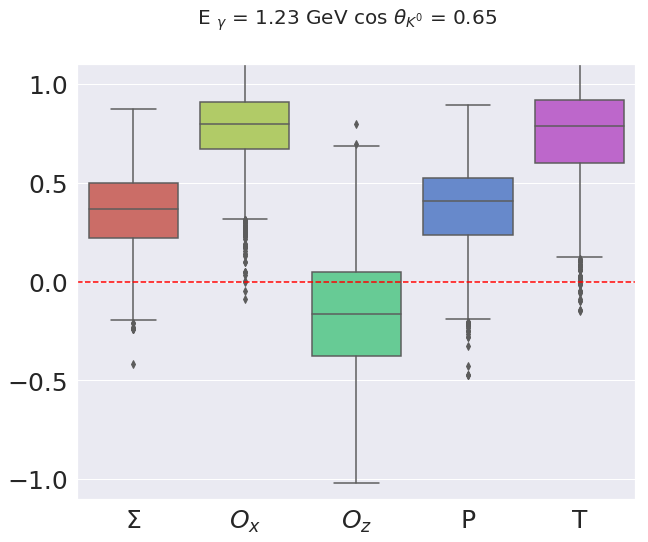

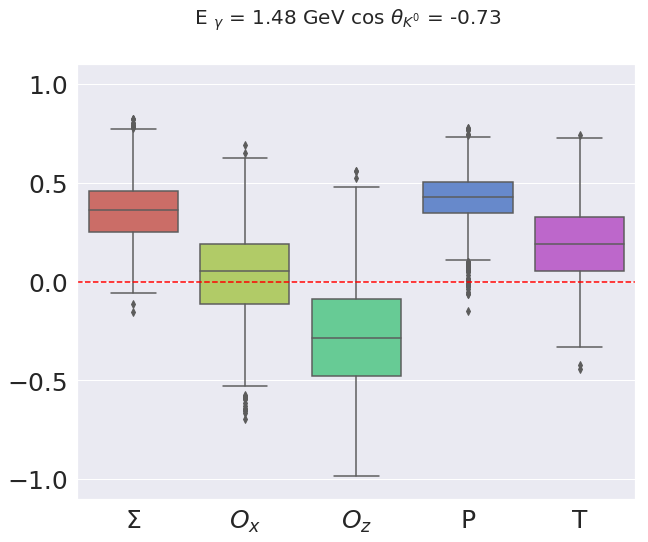

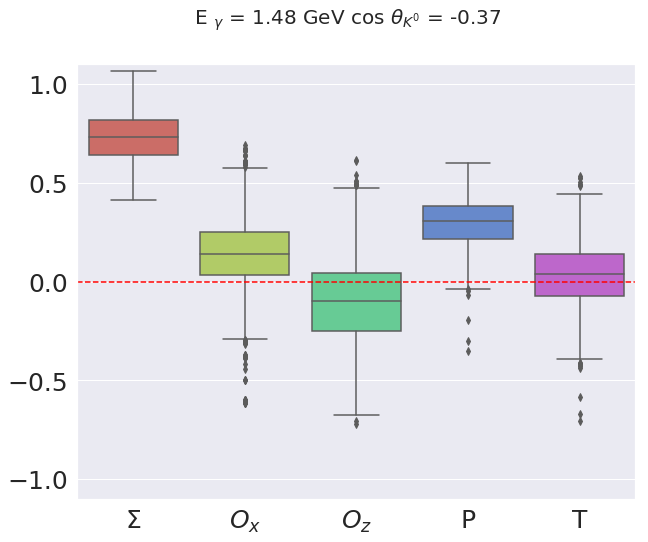

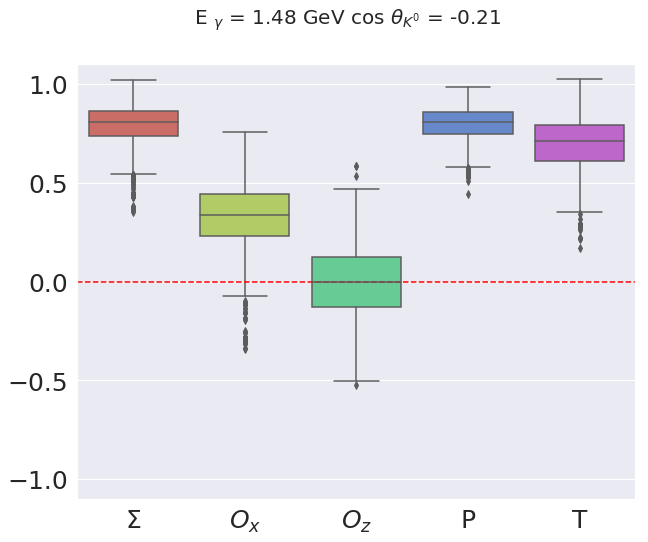

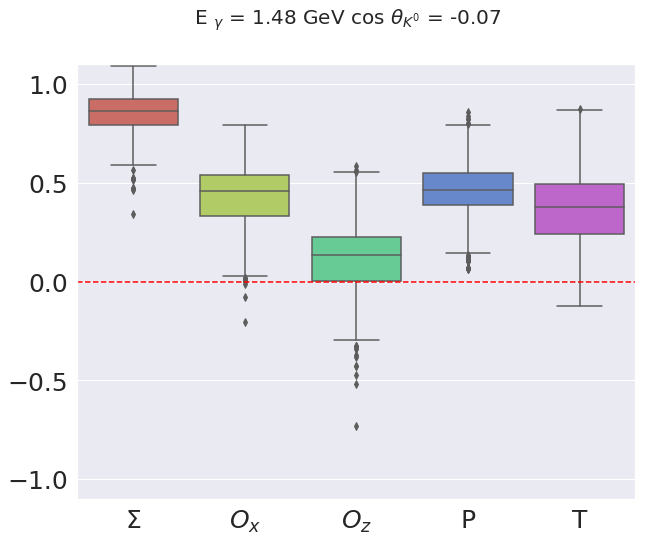

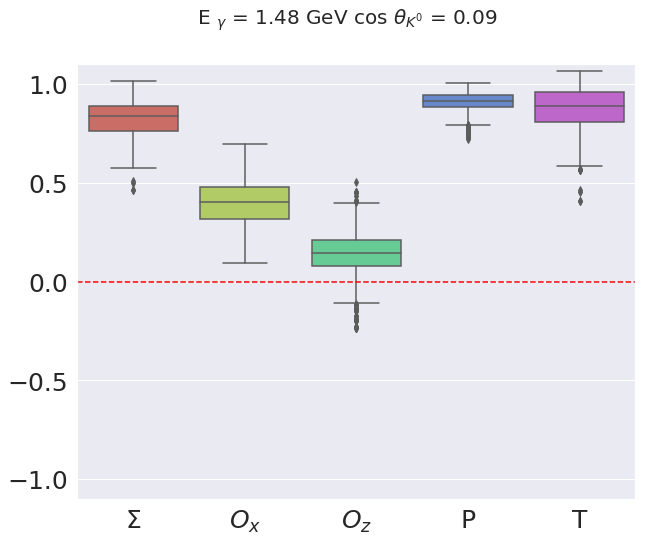

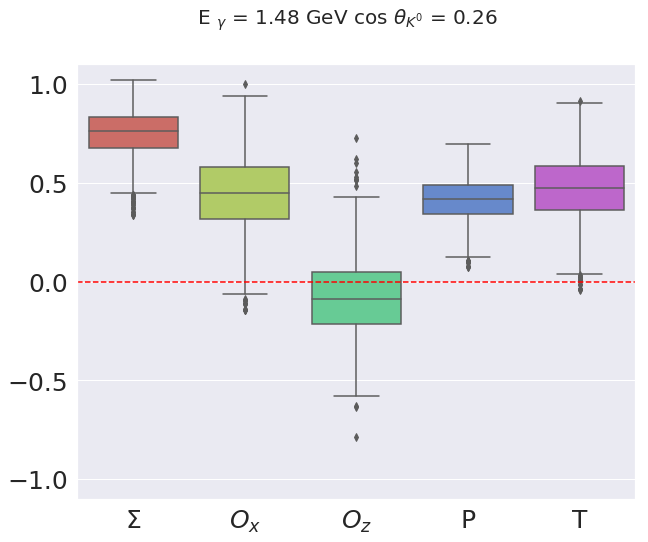

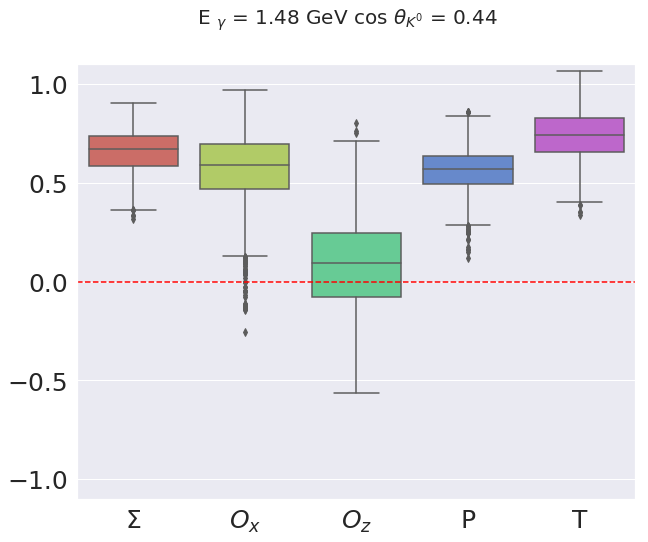

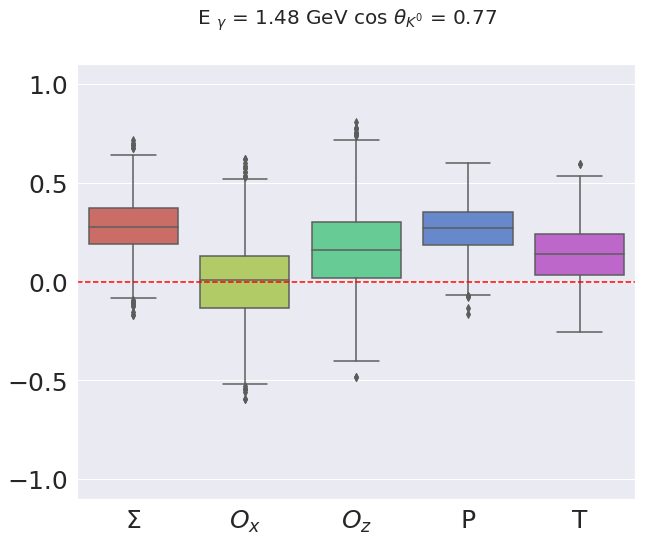

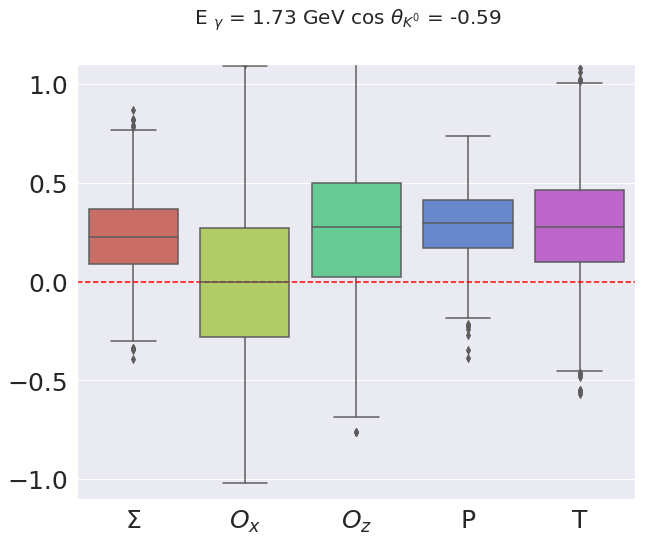

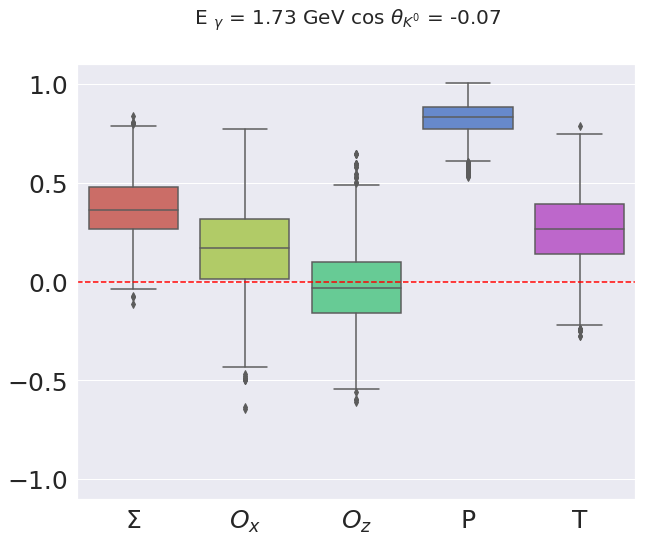

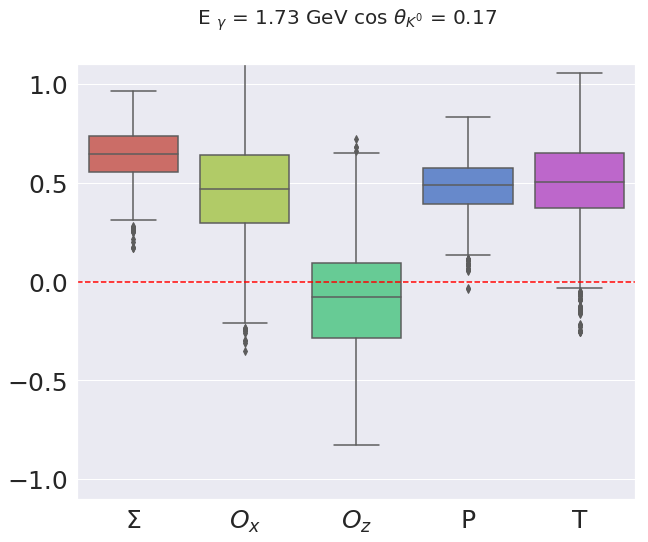

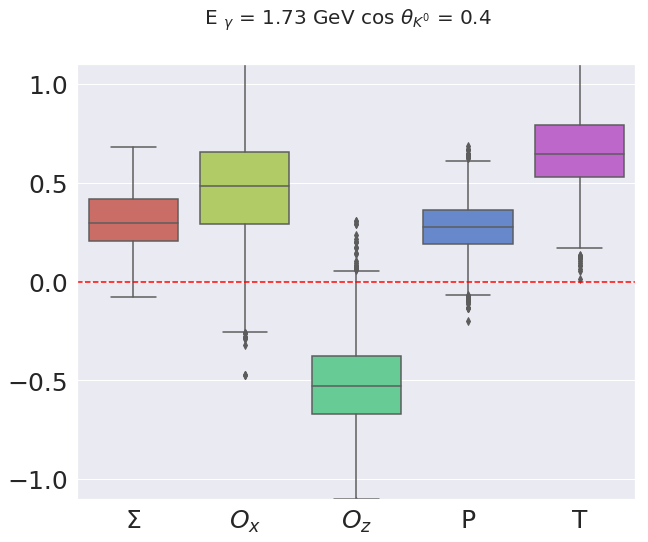

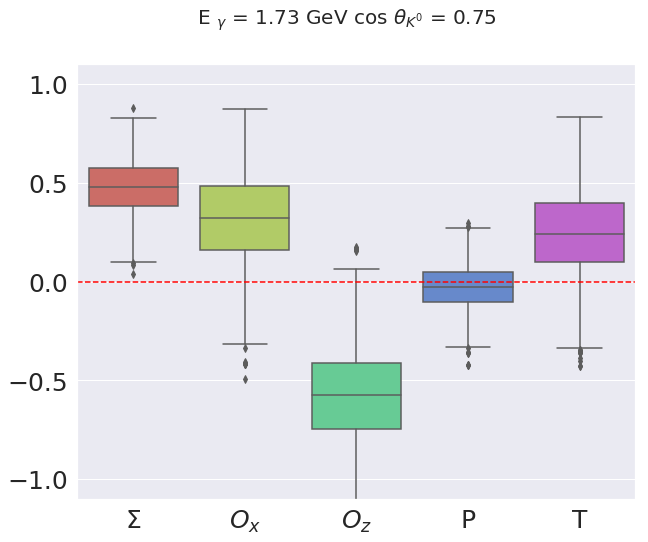

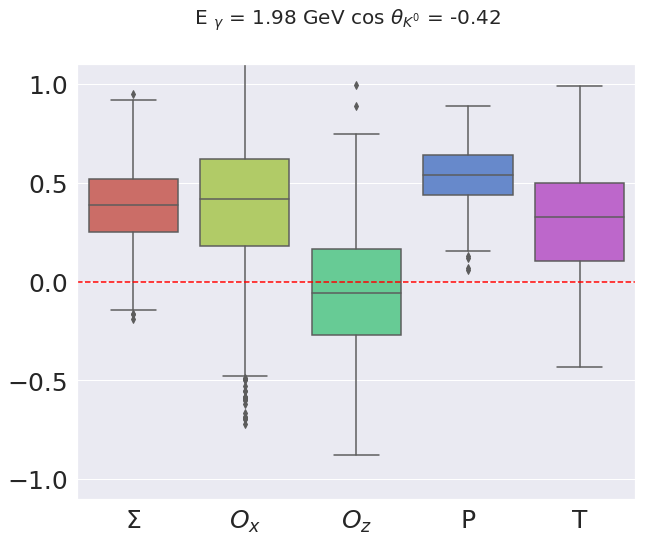

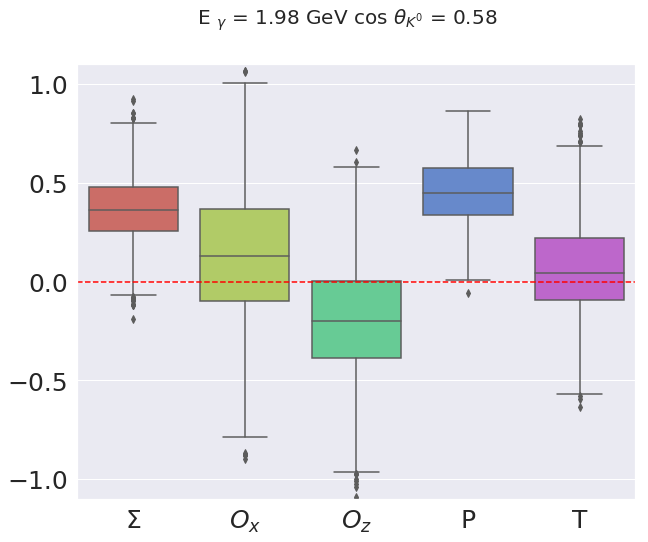

In [12]:
# observable box plots for all bins

Eg_bins = [1.23,1.48,1.73,1.98]
costh_bins = [[-0.81,-0.51,-0.27,-0.05,0.18,0.65],
              [-0.73,-0.37,-0.21,-0.07,0.09,0.26,0.44,0.77],
              [-0.59,-0.07,0.17,0.40,0.75],
              [-0.42, 0.58]
             ]

for ebin_idx in range(len(Eg_bins)):
    for tbin_idx in range(len(costh_bins[ebin_idx])):
        # get the bin
        dfEg = csv_df[csv_df['Egamma']==Eg_bins[ebin_idx]]
        dfCosth = dfEg[dfEg['costh']==costh_bins[ebin_idx][tbin_idx]]

        # get df for each obs
        dfB = dfCosth[dfCosth['Obs']=='B']
        dfB = dfB.reset_index()
        dfOx = dfCosth[dfCosth['Obs']=='Ox']
        dfOx = dfOx.reset_index()
        dfOz = dfCosth[dfCosth['Obs']=='Oz']
        dfOz = dfOz.reset_index()
        dfR = dfCosth[dfCosth['Obs']=='R']
        dfR = dfR.reset_index()
        dfT = dfCosth[dfCosth['Obs']=='T']
        dfT = dfT.reset_index()

        # merge them
        dfObs = pd.concat([dfB['Val'], dfOx['Val'], dfOz['Val'], dfR['Val'], dfT['Val']], 
                  axis=1, keys=['B','Ox','Oz','R','T'])

        # Use cubehelix to get a custom sequential palette
        pal = sns.color_palette("hls", n_obs)

        # Show each distribution with both violins and points
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        bPlt = sns.boxplot(data=dfObs, palette=pal)

        ax.set_ylim(-1.1,1.1)
        ax.axhline(0.0,color='red',linestyle='--')
        ax.set_xticklabels(['$\Sigma$','$O_x$','$O_z$','P','T'])
        bPlt.tick_params(labelsize=25)
        
        fig.suptitle(r'E $_{\gamma}$ = ' + str(Eg_bins[ebin_idx]) + ' GeV '+
                      r'cos $\theta _{K^0}$ = ' + str(costh_bins[ebin_idx][tbin_idx]), fontsize=20)

        plt.show()